<center> <h1> Target2 compound filtering into an unbiased dataset relative to source, microscope configuration and well. </h1> </center>

In [1]:
import polars as pl
from data_v2 import get_table
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 1) Table Creation 

In [2]:
compound = get_table("compound")
well = get_table("well")
plate = get_table("plate")
micro = get_table("microscope_config")
target2 = get_table("target2")
target2_plate = get_table("target2_plate")

In [3]:
# Rename the source 13 into source 7
well = well.with_columns(
    pl.when(pl.col("Metadata_Source").str.contains("_13$"))
    .then(pl.lit("source_7"))
    .otherwise(pl.col("Metadata_Source"))
    .alias("Metadata_Source"))

# Removal of source_9 and source_1.
well = well.filter(pl.col("Metadata_Source").str.contains("_9|_1$") != True)

plate = plate.select(pl.all().exclude("Metadata_Source"))

micro_features = ['Metadata_Source','Metadata_Microscope_Name',
                  'Metadata_Widefield_vs_Confocal',
                  'Metadata_Excitation_Type',
                  'Metadata_Objective_NA',
                  'Metadata_Filter_Configuration']
micro = micro.with_columns(
    ("source_" + pl.col("Metadata_Source").cast(str)).alias("Metadata_Source")).select(
    pl.col(micro_features))


In [6]:
micro = micro.filter(pl.col("Metadata_Source").str.contains("_[19]$|_15$|_13$") != True)
map_micro_ID = micro.select(pl.col("Metadata_Source"),
                            pl.struct(pl.all().exclude("Metadata_Source")).alias("unique"))\
                            .sort(by="unique")\
                            .select(pl.col("Metadata_Source"), pl.col("unique").rle_id().alias("Micro_id"))

micro = micro.join(map_micro_ID,
           on="Metadata_Source",
           how="left")

In [8]:
target2

shape: (307, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ broad_sam ┆ InChIKey  ┆ pert_inam ┆ pubchem_c ┆ … ┆ pert_type ┆ control_t ┆ smiles    ┆ InChI    │
│ ple       ┆ ---       ┆ e         ┆ id        ┆   ┆ ---       ┆ ype       ┆ ---       ┆ ---      │
│ ---       ┆ str       ┆ ---       ┆ ---       ┆   ┆ str       ┆ ---       ┆ str       ┆ str      │
│ str       ┆           ┆ str       ┆ i64       ┆   ┆           ┆ str       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ BRD-K0933 ┆ KBPLFHHGF ┆ 1-octanol ┆ 957       ┆ … ┆ trt       ┆ NA        ┆ CCCCCCCCO ┆ InChI=1S │
│ 8665-001- ┆ OOTCA-UHF ┆           ┆           ┆   ┆           ┆           ┆           ┆ /C8H18O/ │
│ 07-1      ┆ FFAOYSA-N ┆           ┆           ┆   ┆           ┆           ┆           ┆ c1-2-3-4 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ -5-6-7…  │
│ BRD-K4827 ┆ LOUPRKONT ┆ quinine   ┆ 94175     ┆ … ┆ trt       ┆ NA        ┆ C=CC1CN2C ┆ InChI=1S │
│ 8478-001- ┆ ZGTKE-UHF ┆           ┆           ┆   ┆           ┆           ┆ CC1CC2C(O ┆ /C20H24N │
│ 01-2      ┆ FFAOYSA-N ┆           ┆           ┆   ┆           ┆           ┆ )c1ccnc2c ┆ 2O2/c1-3 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ cc(…      ┆ -13-12…  │
│ BRD-A8524 ┆ LPYXWGMUV ┆ ascorbic- ┆ 9888239   ┆ … ┆ trt       ┆ NA        ┆ OCC(O)c1o ┆ InChI=1S │
│ 2401-001- ┆ RGUOY-UHF ┆ acid      ┆           ┆   ┆           ┆           ┆ c(O)c(O)c ┆ /C6H8O6/ │
│ 12-3      ┆ FFAOYSA-N ┆           ┆           ┆   ┆           ┆           ┆ 1O        ┆ c7-1-2(8 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ )5-3(9…  │
│ BRD-K9363 ┆ YGSDEFSMJ ┆ salicylic ┆ 118212070 ┆ … ┆ trt       ┆ NA        ┆ O=C(O)c1c ┆ InChI=1S │
│ 2104-001- ┆ LZEOE-UHF ┆ -acid     ┆           ┆   ┆           ┆           ┆ cccc1O    ┆ /C7H6O3/ │
│ 17-2      ┆ FFAOYSA-N ┆           ┆           ┆   ┆           ┆           ┆           ┆ c8-6-4-2 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ -1-3-5…  │
│ BRD-K5731 ┆ GUUGZPSUO ┆ pidolic-a ┆ 7405      ┆ … ┆ trt       ┆ NA        ┆ Oc1ccc(C( ┆ InChI=1S │
│ 3110-001- ┆ TWOMD-UHF ┆ cid       ┆           ┆   ┆           ┆           ┆ O)O)[nH]1 ┆ /C5H7NO3 │
│ 06-8      ┆ FFAOYSA-N ┆           ┆           ┆   ┆           ┆           ┆           ┆ /c7-4-2- │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1-3(6-…  │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ BRD-A6963 ┆ HSUGRBWQS ┆ diltiazem ┆ 3076      ┆ … ┆ trt       ┆ NA        ┆ COc1ccc(C ┆ InChI=1S │
│ 6825-003- ┆ SZJOP-UHF ┆           ┆           ┆   ┆           ┆           ┆ 2Sc3ccccc ┆ /C22H26N │
│ 04-7      ┆ FFAOYSA-N ┆           ┆           ┆   ┆           ┆           ┆ 3N(CCN(C) ┆ 2O4S/c1- │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ C)C…      ┆ 15(25)…  │
│ BRD-K8778 ┆ KXBDTLQSD ┆ AVL-292   ┆ 59174488  ┆ … ┆ trt       ┆ NA        ┆ C=CC(=O)N ┆ InChI=1S │
│ 2578-001- ┆ KGAEB-UHF ┆           ┆           ┆   ┆           ┆           ┆ c1cccc(N= ┆ /C22H22F │
│ 03-9      ┆ FFAOYSA-N ┆           ┆           ┆   ┆           ┆           ┆ c2[nH]c(= ┆ N5O3/c1- │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ Nc3…      ┆ 3-20(2…  │
│ BRD-K9876 ┆ JZFPYUNJR ┆ niflumic- ┆ 4488      ┆ … ┆ trt       ┆ NA        ┆ O=C(O)c1c ┆ InChI=1S │
│ 3141-001- ┆ RFVQU-UHF ┆ acid      ┆           ┆   ┆           ┆           ┆ cc[nH]c1= ┆ /C13H9F3 │
│ 30-8      ┆ FFAOYSA-N ┆           ┆           ┆   ┆           ┆           ┆ Nc1cccc(C ┆ N2O2/c14 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ (F)…      ┆ -13(15…  │
│ BRD-K1997 ┆ LNFZRMDSZ ┆ GNF-5837  ┆ 5939706

In [12]:
target2.group_by("InChIKey").agg(pl.all().n_unique()).with_columns(
    pl.sum_horizontal(pl.all().exclude("InChIKey")).alias("sum")).filter(pl.col("sum")>8)

shape: (5, 10)
┌──────────────┬──────────────┬────────────┬─────────────┬───┬──────────────┬────────┬───────┬─────┐
│ InChIKey     ┆ broad_sample ┆ pert_iname ┆ pubchem_cid ┆ … ┆ control_type ┆ smiles ┆ InChI ┆ sum │
│ ---          ┆ ---          ┆ ---        ┆ ---         ┆   ┆ ---          ┆ ---    ┆ ---   ┆ --- │
│ str          ┆ u32          ┆ u32        ┆ u32         ┆   ┆ u32          ┆ u32    ┆ u32   ┆ u32 │
╞══════════════╪══════════════╪════════════╪═════════════╪═══╪══════════════╪════════╪═══════╪═════╡
│ AJVXVYTVAAWZ ┆ 2            ┆ 1          ┆ 2           ┆ … ┆ 1            ┆ 1      ┆ 1     ┆ 10  │
│ AP-UHFFFAOYS ┆              ┆            ┆             ┆   ┆              ┆        ┆       ┆     │
│ A-N          ┆              ┆            ┆             ┆   ┆              ┆        ┆       ┆     │
│ UTBOEBCWXGDO ┆ 2            ┆ 1          ┆ 2           ┆ … ┆ 1            ┆ 1      ┆ 1     ┆ 10  │
│ GI-UHFFFAOYS ┆              ┆            ┆             ┆   ┆              ┆        ┆       ┆     │
│ A-N          ┆              ┆            ┆             ┆   ┆              ┆        ┆       ┆     │
│ GJFCONYVAUNL ┆ 2            ┆ 1          ┆ 2           ┆ … ┆ 1            ┆ 1      ┆ 1     ┆ 10  │
│ KB-UHFFFAOYS ┆              ┆            ┆             ┆   ┆              ┆        ┆       ┆     │
│ A-N          ┆              ┆            ┆             ┆   ┆              ┆        ┆       ┆     │
│ QIHBWVVVRYYY ┆ 2            ┆ 1          ┆ 2           ┆ … ┆ 1            ┆ 1      ┆ 1     ┆ 10  │
│ RO-UHFFFAOYS ┆              ┆            ┆             ┆   ┆              ┆        ┆       ┆     │
│ A-N          ┆              ┆            ┆             ┆   ┆              ┆        ┆       ┆     │
│ LOUPRKONTZGT ┆ 2            ┆ 2          ┆ 2           ┆ … ┆ 1            ┆ 1      ┆ 1     ┆ 12  │
│ KE-UHFFFAOYS ┆              ┆            ┆             ┆   ┆              ┆        ┆       ┆     │
│ A-N          ┆              ┆            ┆             ┆   ┆              ┆        ┆       ┆     │
└──────────────┴──────────────┴────────────┴─────────────┴───┴──────────────┴────────┴───────┴─────┘

Here we can notice that InChIKey is not a unique identifier. We should remove duplicates to avoid complication later on. 

broad_sample, pubchem_cid can be removed without hesitation (not useful next for mergin etc.) 
pert_iname and target (target can give insight on moa or it can be another way to group sample than moa. and pert_iname is how we're going to merge moa and our table at the end) can still be informative so we should deal with this sample: "LOUPRKONTZGTKE..."

In [13]:
target2.filter(pl.col("InChIKey").str.contains("LOUPRKONTZGTKE"))

shape: (2, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ broad_sam ┆ InChIKey  ┆ pert_inam ┆ pubchem_c ┆ … ┆ pert_type ┆ control_t ┆ smiles    ┆ InChI    │
│ ple       ┆ ---       ┆ e         ┆ id        ┆   ┆ ---       ┆ ype       ┆ ---       ┆ ---      │
│ ---       ┆ str       ┆ ---       ┆ ---       ┆   ┆ str       ┆ ---       ┆ str       ┆ str      │
│ str       ┆           ┆ str       ┆ i64       ┆   ┆           ┆ str       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ BRD-K4827 ┆ LOUPRKONT ┆ quinine   ┆ 94175     ┆ … ┆ trt       ┆ NA        ┆ C=CC1CN2C ┆ InChI=1S │
│ 8478-001- ┆ ZGTKE-UHF ┆           ┆           ┆   ┆           ┆           ┆ CC1CC2C(O ┆ /C20H24N │
│ 01-2      ┆ FFAOYSA-N ┆           ┆           ┆   ┆           ┆           ┆ )c1ccnc2c ┆ 2O2/c1-3 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ cc(…      ┆ -13-12…  │
│ BRD-K5963 ┆ LOUPRKONT ┆ quinidine ┆ 441074    ┆ … ┆ trt       ┆ NA        ┆ C=CC1CN2C ┆ InChI=1S │
│ 2282-052- ┆ ZGTKE-UHF ┆           ┆           ┆   ┆           ┆           ┆ CC1CC2C(O ┆ /C20H24N │
│ 03-1      ┆ FFAOYSA-N ┆           ┆           ┆   ┆           ┆           ┆ )c1ccnc2c ┆ 2O2/c1-3 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ cc(…      ┆ -13-12…  │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

When looking at the following website, the InChiKey is supposed to be different: 
* quinidine:
  - [LOUPRKONTZGTKE-WGFDLZGGSA-N](https://webbook.nist.gov/cgi/inchi?ID=C56542) (from webbook chemistry NIST)
  - [LOUPRKONTZGTKE-LHHVKLHASA-N](https://pubchem.ncbi.nlm.nih.gov/compound/Quinidine#section=Crystal-Structures) (from PubChem NIH)
* quinine:
  - [LOUPRKONTZGTKE-UHFFFAOYSA-N](https://webbook.nist.gov/cgi/inchi/InChI%3D1S/C20H24N2O2/c1-3-13-12-22-9-7-14(13)10-19(22)20(23)16-6-8-21-18-5-4-15(24-2)11-17(16)18/h3-6%2C8%2C11%2C13-14%2C19-20%2C23H%2C1%2C7%2C9-10%2C12H2%2C2H3) (from webbook chemistry NIST)
  - [LOUPRKONTZGTKE-WZBLMQSHSA-N](https://pubchem.ncbi.nlm.nih.gov/compound/Quinine#section=Computed-Descriptors) (from PubChem NIH)

The difference happens to be within the 8 digits which account for the stereochemistry cf [original_paper](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-015-0068-4/figures/7), for instance: "LHHVKLHA".

Let's see the one chosen in Target2 and the amount of different digits in compound. 

In [14]:
target2.filter(pl.col("InChIKey").str.contains("LOUPRKONTZGTKE")).select(
    pl.col("InChIKey").unique()).to_numpy()

array([['LOUPRKONTZGTKE-UHFFFAOYSA-N']], dtype=object)

In [15]:
compound.select(pl.col("Metadata_InChIKey").str.extract("\w+-(\w{8}SA)-").unique())

shape: (3, 1)
┌───────────────────┐
│ Metadata_InChIKey │
│ ---               │
│ str               │
╞═══════════════════╡
│ UHFFFAOYSA        │
│ QOPSANPBSA        │
│ null              │
└───────────────────┘

Therefore: quinine is the valid one to keep. 

In [16]:
target2 = target2.filter(pl.col("broad_sample").str.contains("BRD-K59632282-") != True)

In [17]:
target2 = target2.select(pl.all().exclude(["broad_sample", "pubchem_cid"])).unique()

In [18]:
merge_table = compound.join(well, on=pl.col("Metadata_JCP2022"), how="inner")\
.join(plate, on=pl.col("Metadata_Plate"), how="inner")\
.join(micro, on=pl.col("Metadata_Source"), how="inner")\
.join(target2,left_on=pl.col("Metadata_InChIKey"), right_on=pl.col("InChIKey"), how="inner")

merge_table = merge_table.unique()


In [30]:
merge_table.shape

(212865, 21)

In [49]:
merge_table.filter(pl.col("Metadata_Plate").is_in(
    merge_table.filter(pl.col("pert_type") != "control").select(pl.col("Metadata_Plate")).unique()
))

shape: (166_788, 21)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Metadata_ ┆ Metadata_ ┆ Metadata_ ┆ Metadata_ ┆ … ┆ pert_type ┆ control_t ┆ smiles    ┆ InChI    │
│ JCP2022   ┆ InChIKey  ┆ InChI     ┆ Source    ┆   ┆ ---       ┆ ype       ┆ ---       ┆ ---      │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ str       ┆ ---       ┆ str       ┆ str      │
│ str       ┆ str       ┆ str       ┆ str       ┆   ┆           ┆ str       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ JCP2022_0 ┆ OINGHOPGN ┆ InChI=1S/ ┆ source_2  ┆ … ┆ control   ┆ poscon_cp ┆ CC(C)NC(= ┆ InChI=1S │
│ 64022     ┆ MYCAB-UHF ┆ C23H25ClF ┆           ┆   ┆           ┆           ┆ O)N1CCC(N ┆ /C23H25C │
│           ┆ FFAOYSA-N ┆ 3N5O/c1-1 ┆           ┆   ┆           ┆           ┆ =C2Nc3cc( ┆ lF3N5O/c │
│           ┆           ┆ 3(2…      ┆           ┆   ┆           ┆           ┆ F)c…      ┆ 1-13(2…  │
│ JCP2022_0 ┆ IAZDPXIOM ┆ InChI=1S/ ┆ source_7  ┆ … ┆ control   ┆ negcon    ┆ C[S+](C)[ ┆ InChI=1S │
│ 33924     ┆ UYVGZ-UHF ┆ C2H6OS/c1 ┆           ┆   ┆           ┆           ┆ O-]       ┆ /C2H6OS/ │
│           ┆ FFAOYSA-N ┆ -4(2)3/h1 ┆           ┆   ┆           ┆           ┆           ┆ c1-4(2)3 │
│           ┆           ┆ -2H…      ┆           ┆   ┆           ┆           ┆           ┆ /h1-2H…  │
│ JCP2022_0 ┆ LOUPRKONT ┆ InChI=1S/ ┆ source_6  ┆ … ┆ trt       ┆ NA        ┆ C=CC1CN2C ┆ InChI=1S │
│ 50797     ┆ ZGTKE-UHF ┆ C20H24N2O ┆           ┆   ┆           ┆           ┆ CC1CC2C(O ┆ /C20H24N │
│           ┆ FFAOYSA-N ┆ 2/c1-3-13 ┆           ┆   ┆           ┆           ┆ )c1ccnc2c ┆ 2O2/c1-3 │
│           ┆           ┆ -12…      ┆           ┆   ┆           ┆           ┆ cc(…      ┆ -13-12…  │
│ JCP2022_0 ┆ OINGHOPGN ┆ InChI=1S/ ┆ source_3  ┆ … ┆ control   ┆ poscon_cp ┆ CC(C)NC(= ┆ InChI=1S │
│ 64022     ┆ MYCAB-UHF ┆ C23H25ClF ┆           ┆   ┆           ┆           ┆ O)N1CCC(N ┆ /C23H25C │
│           ┆ FFAOYSA-N ┆ 3N5O/c1-1 ┆           ┆   ┆           ┆           ┆ =C2Nc3cc( ┆ lF3N5O/c │
│           ┆           ┆ 3(2…      ┆           ┆   ┆           ┆           ┆ F)c…      ┆ 1-13(2…  │
│ JCP2022_0 ┆ IAZDPXIOM ┆ InChI=1S/ ┆ source_7  ┆ … ┆ control   ┆ negcon    ┆ C[S+](C)[ ┆ InChI=1S │
│ 33924     ┆ UYVGZ-UHF ┆ C2H6OS/c1 ┆           ┆   ┆           ┆           ┆ O-]       ┆ /C2H6OS/ │
│           ┆ FFAOYSA-N ┆ -4(2)3/h1 ┆           ┆   ┆           ┆           ┆           ┆ c1-4(2)3 │
│           ┆           ┆ -2H…      ┆           ┆   ┆           ┆           ┆           ┆ /h1-2H…  │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ JCP2022_0 ┆ HULPONUAI ┆ InChI=1S/ ┆ source_4  ┆ … ┆ trt       ┆ NA        ┆ CC=C(C)C( ┆ InChI=1S │
│ 32680     ┆ NYLQQ-UHF ┆ C25H34O6/ ┆           ┆   ┆           ┆           ┆ =O)OC1C(C ┆ /C25H34O │
│           ┆ FFAOYSA-N ┆ c1-7-12(2 ┆           ┆   ┆           ┆           ┆ )=CC23C(= ┆ 6/c1-7-1 │
│           ┆           ┆ )22…      ┆           ┆   ┆           ┆           ┆ O)C…      ┆ 2(2)22…  │
│ JCP2022_0 ┆ CKTSBUTUH ┆ InChI=1S/ ┆ source_5  ┆ … ┆ trt       ┆ NA        ┆ N=c1ccn(C ┆ InChI=1S │
│ 11759     ┆ BMZGZ-UHF ┆ C9H13N3O4 ┆           ┆   ┆           ┆           ┆ 2CC(O)C(C ┆ /C9H13N3 │
│           ┆ FFAOYSA-N ┆ /c10-7-1- ┆           ┆   ┆           ┆           ┆ O)O2)c(=O ┆ O4/c10-7 │
│           ┆           ┆ 2-1…      ┆           ┆   ┆           ┆           ┆ )[n…      ┆ -1-2-1…  │
│ JCP2022_0 ┆ GJFCONYVA ┆ InChI=1S/ ┆ source_7  ┆ … ┆ trt       ┆ NA        ┆ CC1CC2C3C ┆ InChI=1S │
│ 25848     ┆ UNLKB-UHF ┆ C22H29FO5 ┆           ┆   ┆           ┆           ┆ C=C4CC(=O ┆ /C22H29F │
│           ┆ FFAOYSA-N ┆ /c1-12-8- ┆           ┆   ┆           ┆           ┆ )C=CC4(C) ┆ O5/c1-12 │
│           ┆           ┆ 16-…      ┆           ┆   ┆           ┆           ┆ C3(…      ┆ -8-16-…  │
│ JCP2022_0 ┆ SRVFFFJZQ ┆ InChI=1S/ ┆ so

In [20]:
merge_table.select(pl.all().n_unique())

shape: (1, 21)
┌─────────────┬────────────┬────────────┬────────────┬───┬───────────┬────────────┬────────┬───────┐
│ Metadata_JC ┆ Metadata_I ┆ Metadata_I ┆ Metadata_S ┆ … ┆ pert_type ┆ control_ty ┆ smiles ┆ InChI │
│ P2022       ┆ nChIKey    ┆ nChI       ┆ ource      ┆   ┆ ---       ┆ pe         ┆ ---    ┆ ---   │
│ ---         ┆ ---        ┆ ---        ┆ ---        ┆   ┆ u32       ┆ ---        ┆ u32    ┆ u32   │
│ u32         ┆ u32        ┆ u32        ┆ u32        ┆   ┆           ┆ u32        ┆        ┆       │
╞═════════════╪════════════╪════════════╪════════════╪═══╪═══════════╪════════════╪════════╪═══════╡
│ 302         ┆ 302        ┆ 302        ┆ 9          ┆ … ┆ 2         ┆ 5          ┆ 302    ┆ 302   │
└─────────────┴────────────┴────────────┴────────────┴───┴───────────┴────────────┴────────┴───────┘

# 2) Analysis of the Table distribution of compounds among sources or well. 

/tmp/ipykernel_1388239/2374431215.py:38: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  sample_well_map = info_per_well.pivot(index="Well_letter",
/tmp/ipykernel_1388239/2374431215.py:41: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  compound_well_map = info_per_well.pivot(index="Well_letter",


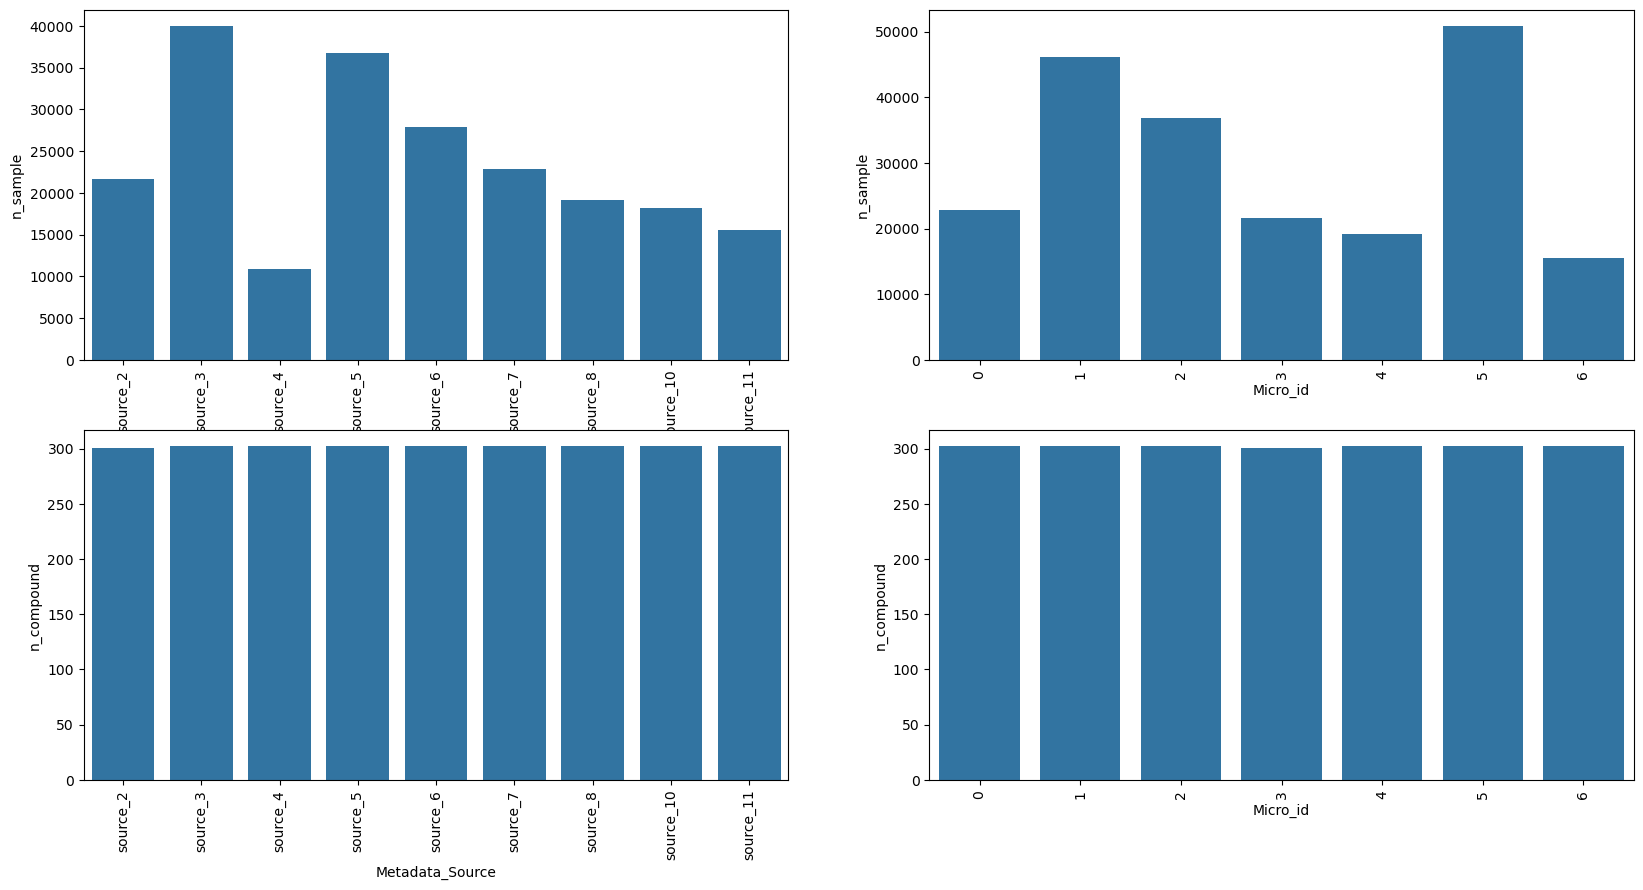

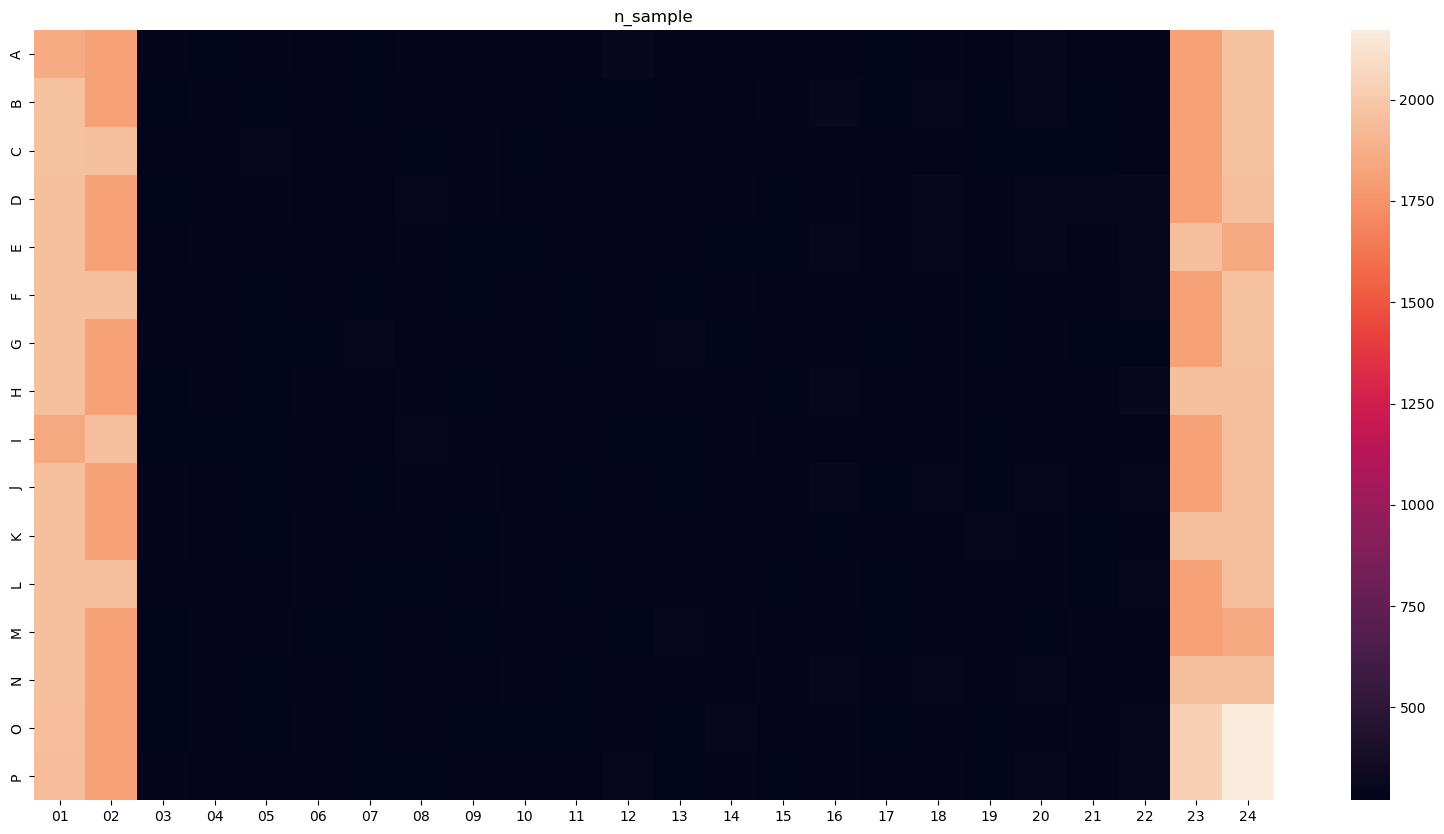

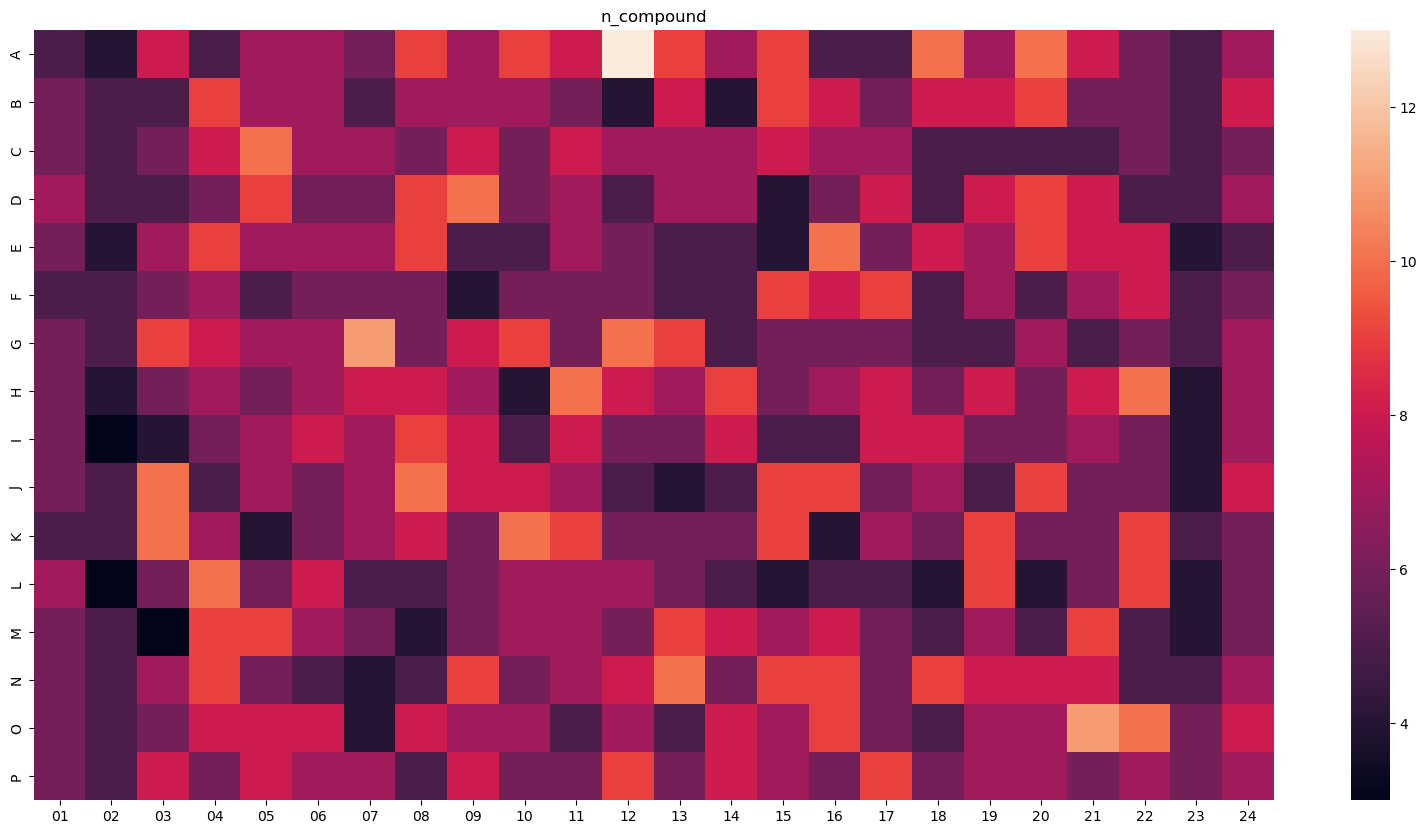

In [43]:
def show_distribution(filter_merge_table):
    info_per_source = (filter_merge_table.group_by("Metadata_Source")
                         .agg(
                             pl.col("Metadata_JCP2022").n_unique().alias("n_compound"),
                             pl.col("Metadata_JCP2022").count().alias("n_sample"))
                       .sort(by=pl.col("Metadata_Source").str.extract("\D+_(\d+)").cast(pl.Int16)))
     
    info_per_micro = (filter_merge_table.group_by("Micro_id")
                         .agg(
                             pl.col("Metadata_JCP2022").n_unique().alias("n_compound"),
                             pl.col("Metadata_JCP2022").count().alias("n_sample"))
                       .sort(by="Micro_id"))
    

    info_per_well = (filter_merge_table.group_by("Metadata_Well")
                     .agg(
                         pl.col("Metadata_JCP2022").n_unique().alias("n_compound"),
                         pl.col("Metadata_JCP2022").count().alias("n_sample"))
                   .sort(by="Metadata_Well").select(
                       pl.col("Metadata_Well").str.extract("(\D+)").alias("Well_letter"),
                       pl.col("Metadata_Well").str.extract("\D+(\d+)").alias("Well_numb"),
                       pl.col("n_compound", "n_sample")))

    
    fig, axes = plt.subplots(2,2, figsize=(20, 10))
    info_per_group = [info_per_source, info_per_micro]
    group = ["Metadata_Source", "Micro_id"]
    info = ["n_sample", "n_compound"]
    for i in range(2):
        for j in range(2):
            sns.barplot(info_per_group[j],
                       x=group[j],
                       y=info[i],
                       ax=axes[i][j])
            axes[i][j].tick_params(axis='x', rotation=90)


    sample_well_map = info_per_well.pivot(index="Well_letter",
                                    columns="Well_numb",
                                    values="n_sample")
    compound_well_map = info_per_well.pivot(index="Well_letter",
                                    columns="Well_numb",
                                    values="n_compound")
    
    
    fig2, ax2 = plt.subplots(1, figsize=(20,10))
    sns.heatmap(sample_well_map.select(pl.all().exclude("Well_letter")),
                ax=ax2)
    ax2.set_xticklabels(sample_well_map.columns[1:])
    ax2.set_yticklabels(sample_well_map.select(pl.col("Well_letter")).to_numpy().reshape(-1))
    ax2.set_title("n_sample")

    
    fig3, ax3 = plt.subplots(1, figsize=(20,10))
    sns.heatmap(compound_well_map.select(pl.all().exclude("Well_letter")),
                ax=ax3)
    ax3.set_xticklabels(compound_well_map.columns[1:])
    ax3.set_yticklabels(compound_well_map.select(pl.col("Well_letter")).to_numpy().reshape(-1))
    ax3.set_title("n_compound")
show_distribution(merge_table)

In [645]:
merge_table.group_by("Metadata_Source").agg(pl.col("Metadata_JCP2022").n_unique())

shape: (9, 2)
┌─────────────────┬──────────────────┐
│ Metadata_Source ┆ Metadata_JCP2022 │
│ ---             ┆ ---              │
│ str             ┆ u32              │
╞═════════════════╪══════════════════╡
│ source_2        ┆ 301              │
│ source_8        ┆ 302              │
│ source_3        ┆ 302              │
│ source_4        ┆ 302              │
│ source_11       ┆ 302              │
│ source_6        ┆ 302              │
│ source_7        ┆ 302              │
│ source_10       ┆ 302              │
│ source_5        ┆ 302              │
└─────────────────┴──────────────────┘

* The goal is to downsample each source so it is more alike to source 4. But we cannot remove sample randomly without risking removing some interesting compound of target2. Indeed in target2 there are poscon or negcon that might have been overused in some sources so we should downsampling from those negcon and poscon. There should be easy to identify as they should have been overused.
* There is one compound that has not been used in all sources so let's remove it as well. 

# 3) Table Filtering
### a) Removal of the compounds not in all sources.

In [646]:
merge_table = (merge_table.filter(
    pl.col("Metadata_JCP2022").is_in((merge_table.group_by("Metadata_JCP2022")
                                      .agg(pl.col("Metadata_Source").n_unique()).
                                      filter(pl.col("Metadata_Source") < 9)
                                      .select("Metadata_JCP2022")).to_series()) == False))

### b) Identification of the compounds to downsample. 

In [647]:
compounds_info = (merge_table.group_by("Metadata_JCP2022")
                  .agg(pl.col("Metadata_InChIKey").count().alias("Sample_count"),
                       pl.col("Metadata_Source", "Metadata_Well", "Micro_id")
                       .n_unique().name.prefix("Unique_"))
                       )

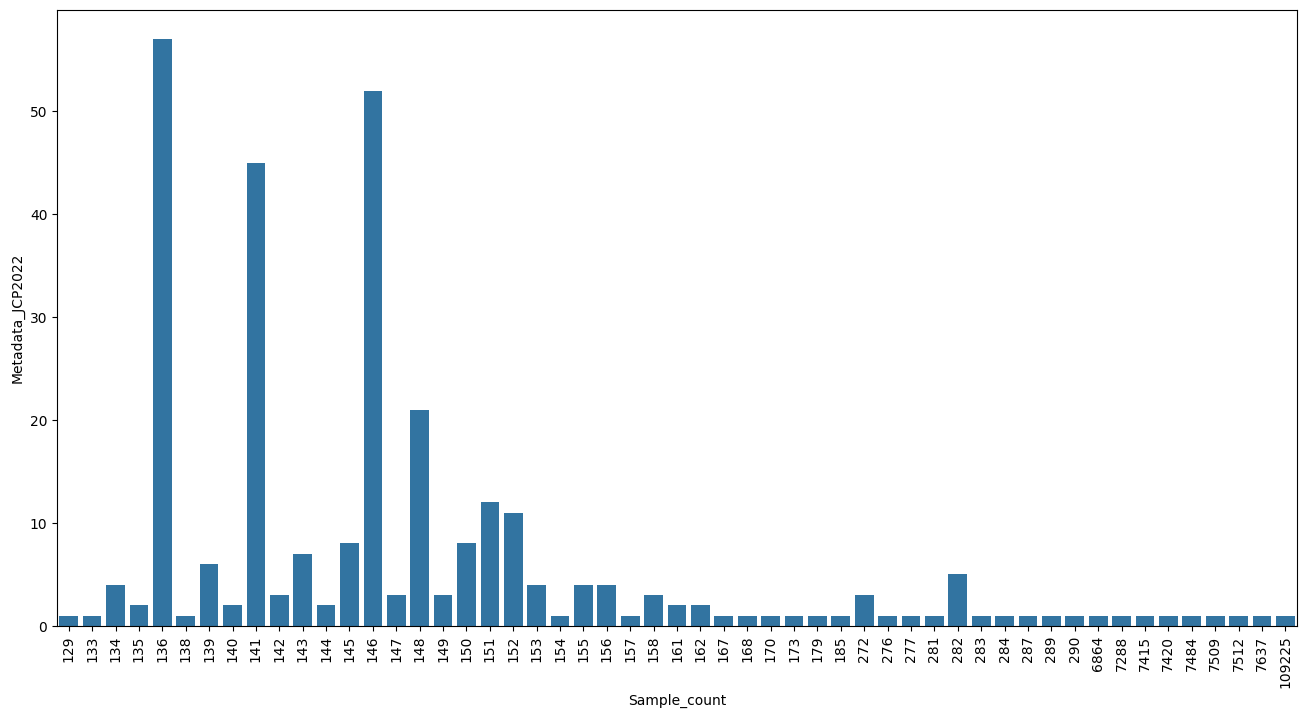

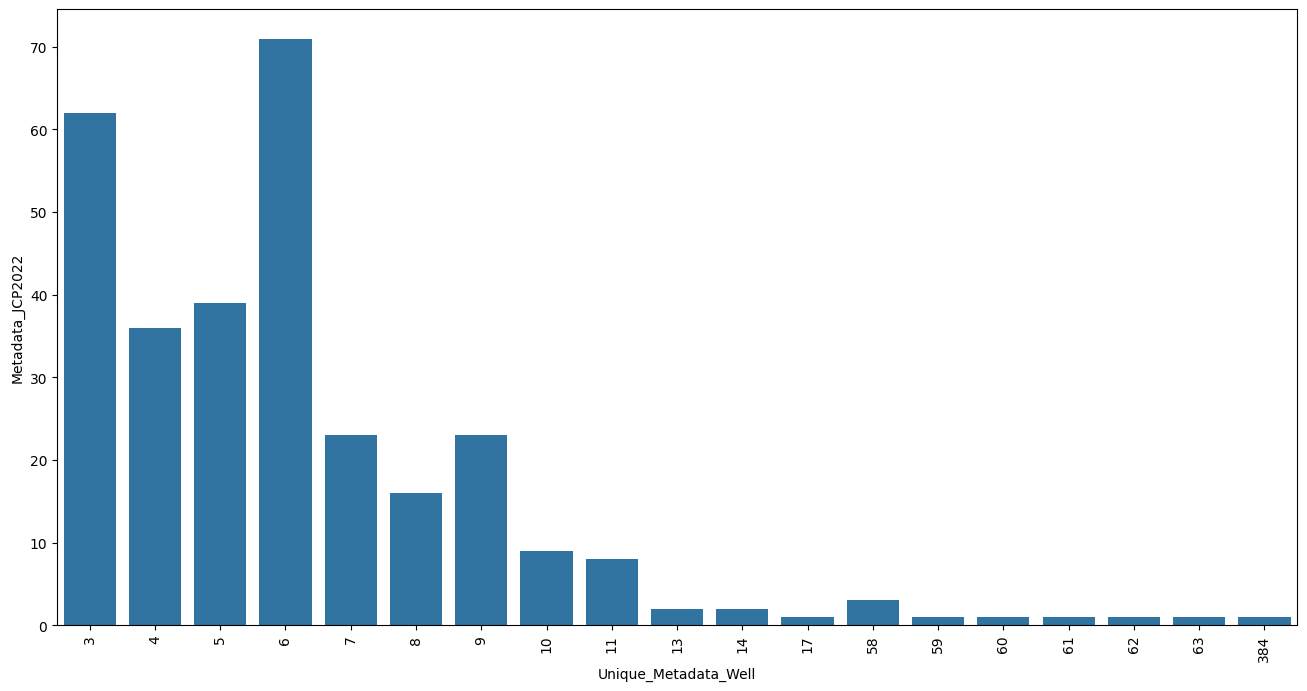

In [648]:
fig, ax1 = plt.subplots(1, figsize=(16,8))

df = (compounds_info.group_by("Sample_count")
             .agg(pl.col("Metadata_JCP2022").n_unique()).sort(by="Sample_count"))

sns.barplot(df,
            x="Sample_count",
            y="Metadata_JCP2022",
            ax=ax1)
ax1.tick_params(axis='x', rotation=90)

fig, ax2 = plt.subplots(1, figsize=(16,8))

df2 = (compounds_info.group_by("Unique_Metadata_Well")
             .agg(pl.col("Metadata_JCP2022").n_unique()).sort(by="Unique_Metadata_Well"))

sns.barplot(df2,
            x="Unique_Metadata_Well",
            y="Metadata_JCP2022",
            ax=ax2)
ax2.tick_params(axis='x', rotation=90)

4 group can be identified looking at the count of sample per compounds. 
* Compounds with a usage < 200 samples.
* Compounds with a usage between 200 and 300 samples.
* Compounds with a usage between 6000 and 8000 samples: This is usually control.
* Compounds with a usage exceptionnally high, more than 8000 usage: This must be DMSO.  

Each category should be down sample seperately. 

### c) Down Sampling of the control

In [649]:
seed = 42

In [650]:
controle_name = (compounds_info
.filter(pl.col("Sample_count") > 8000).select("Metadata_JCP2022")).to_series()

trt_name = (compounds_info
.filter(pl.col("Sample_count") < 200).select("Metadata_JCP2022")).to_series()

between1_name = (compounds_info
.filter(pl.col("Sample_count").is_between(200, 300)).select("Metadata_JCP2022")).to_series()

between2_name = (compounds_info
.filter(pl.col("Sample_count").is_between(6000, 8000)).select("Metadata_JCP2022")).to_series()

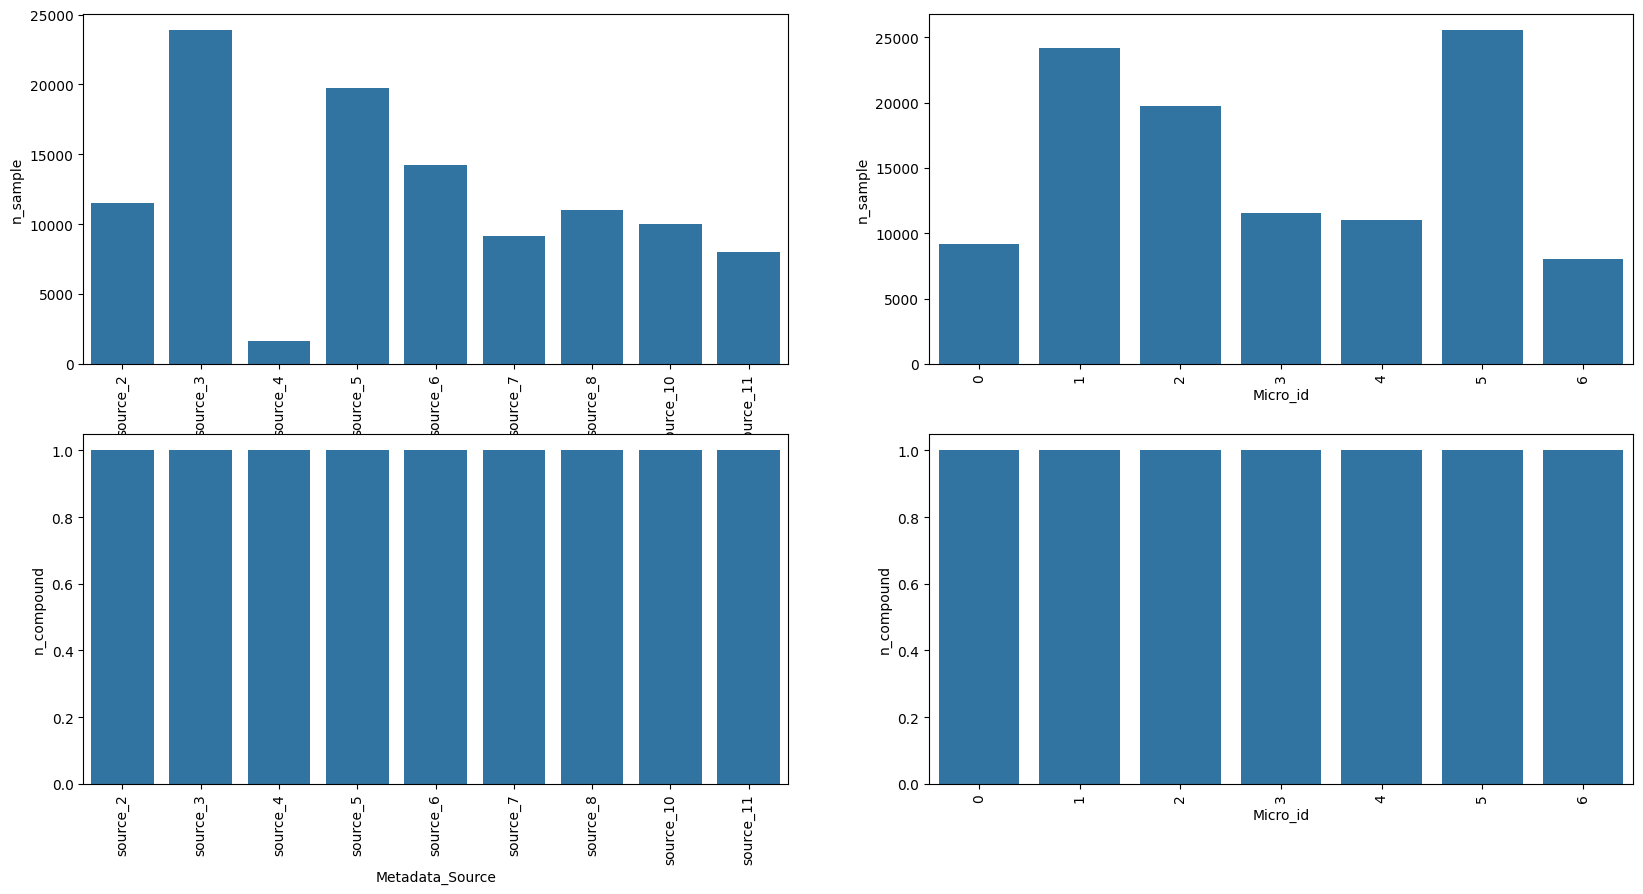

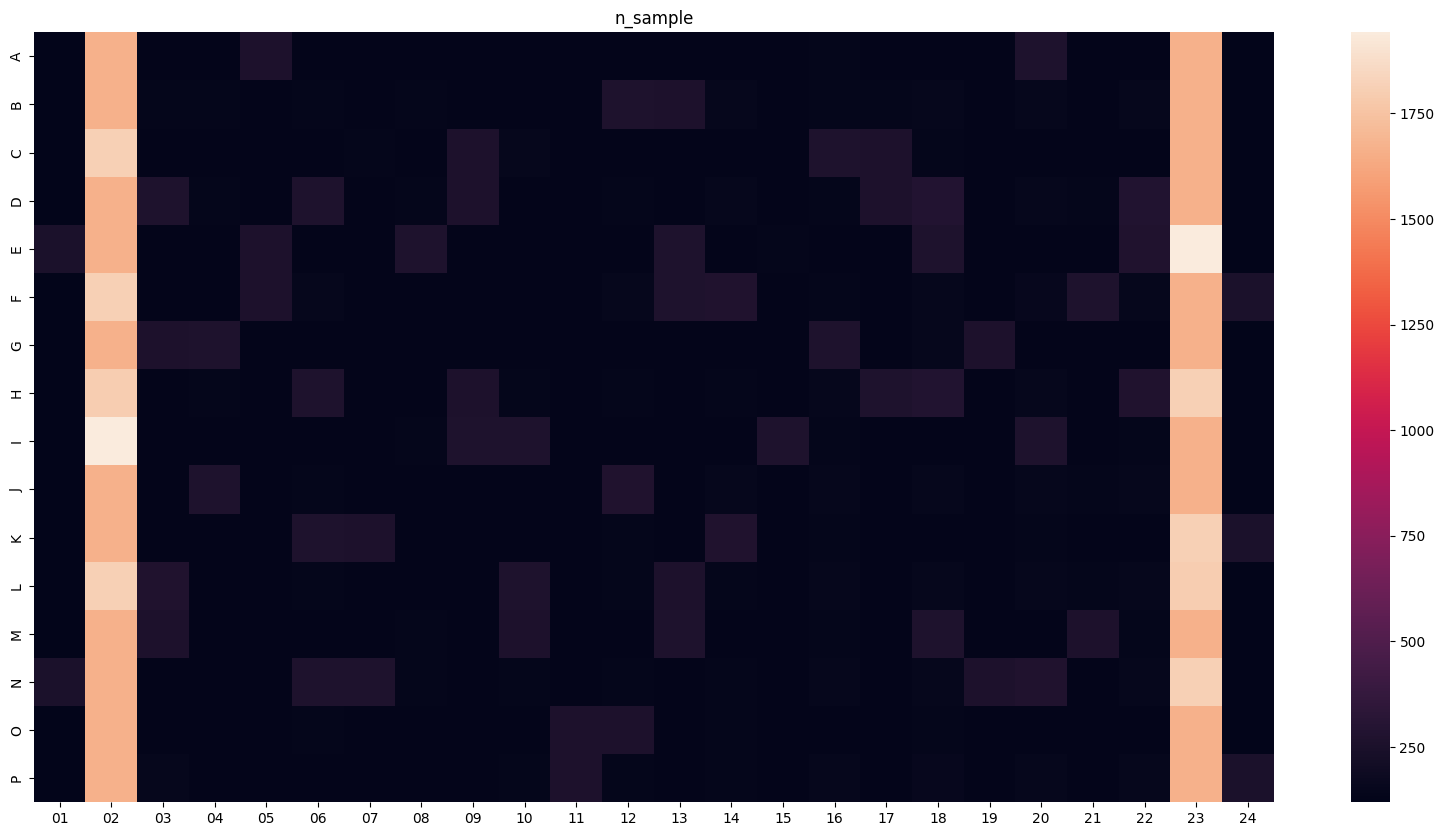

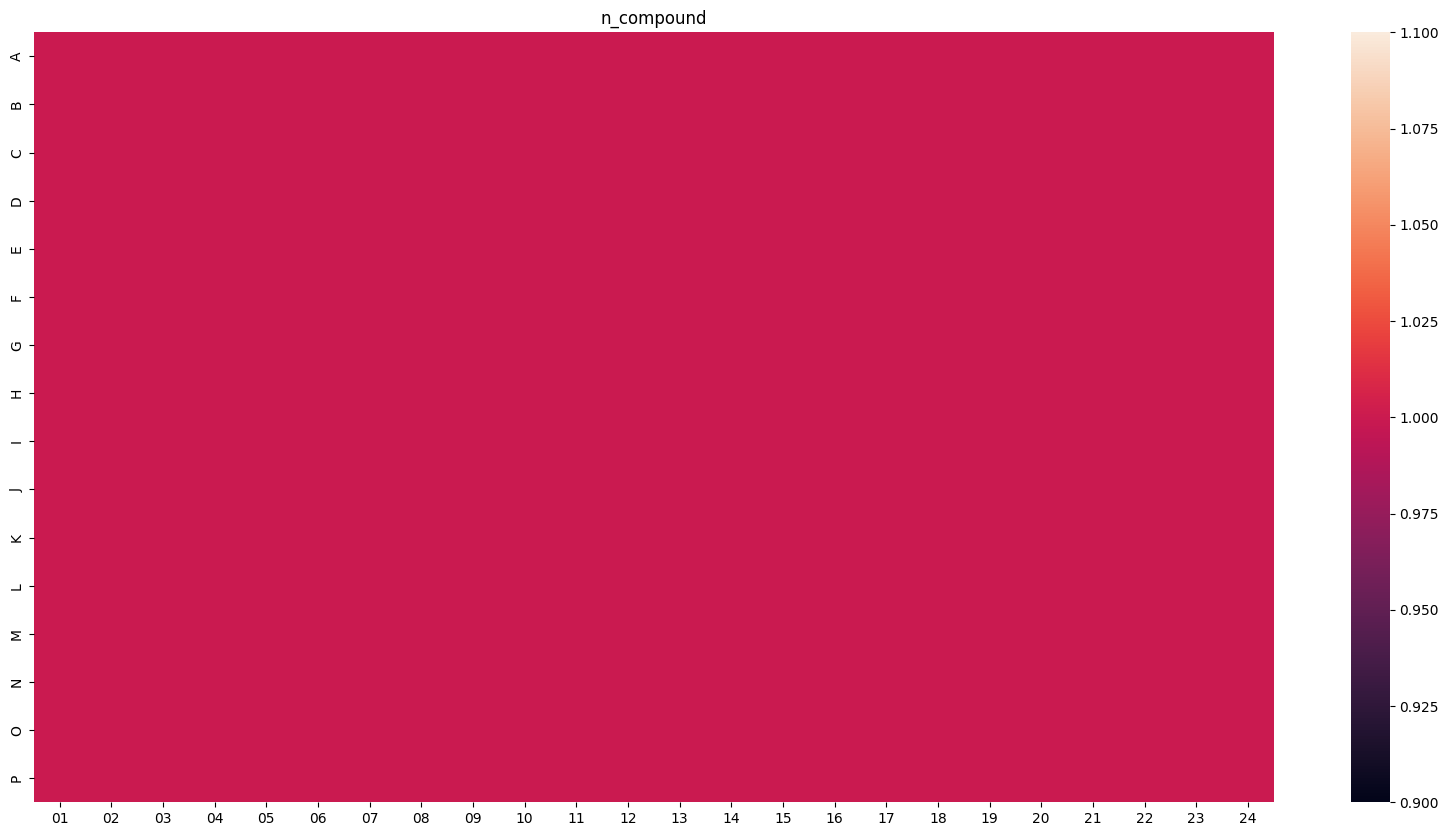

In [651]:
# First see how to downsample
show_distribution(merge_table.filter(
    pl.col("Metadata_JCP2022").is_in(
        controle_name)))

In [652]:
#For every source except for the source 4, down sampling to only 2800 samples 
merge_table_control = (merge_table.filter(
    pl.col("Metadata_JCP2022").is_in(controle_name))
.filter(
    pl.col("Metadata_Source").str.contains("_4$") != True)
.sort(by=["Metadata_Source", "Metadata_JCP2022", "Metadata_Plate", "Metadata_Well", "Metadata_Batch"]))

merge_table_control_keep = (merge_table_control.group_by("Metadata_Source")
     .agg(pl.struct(pl.col("Metadata_JCP2022", "Metadata_Plate", "Metadata_Well", "Metadata_Batch"))
          .sort()
          .sample(1660, seed=seed))
     .sort(by="Metadata_Source")
    .explode("Metadata_JCP2022")
    .unnest("Metadata_JCP2022"))

In [653]:
merge_table_control = (merge_table_control.join(merge_table_control_keep,
                         on=["Metadata_Source","Metadata_JCP2022", "Metadata_Plate", 
                             "Metadata_Well", "Metadata_Batch"],
                         how="inner")
                       .unique()
                       .join((merge_table.filter(
                           pl.col("Metadata_JCP2022").is_in(controle_name))
                              .filter(
                                  pl.col("Metadata_Source").str.contains("_4$"))),
                             on=merge_table.columns,
                             how="outer")).unique()

### d) Down Sampling of the between1 and between2 category

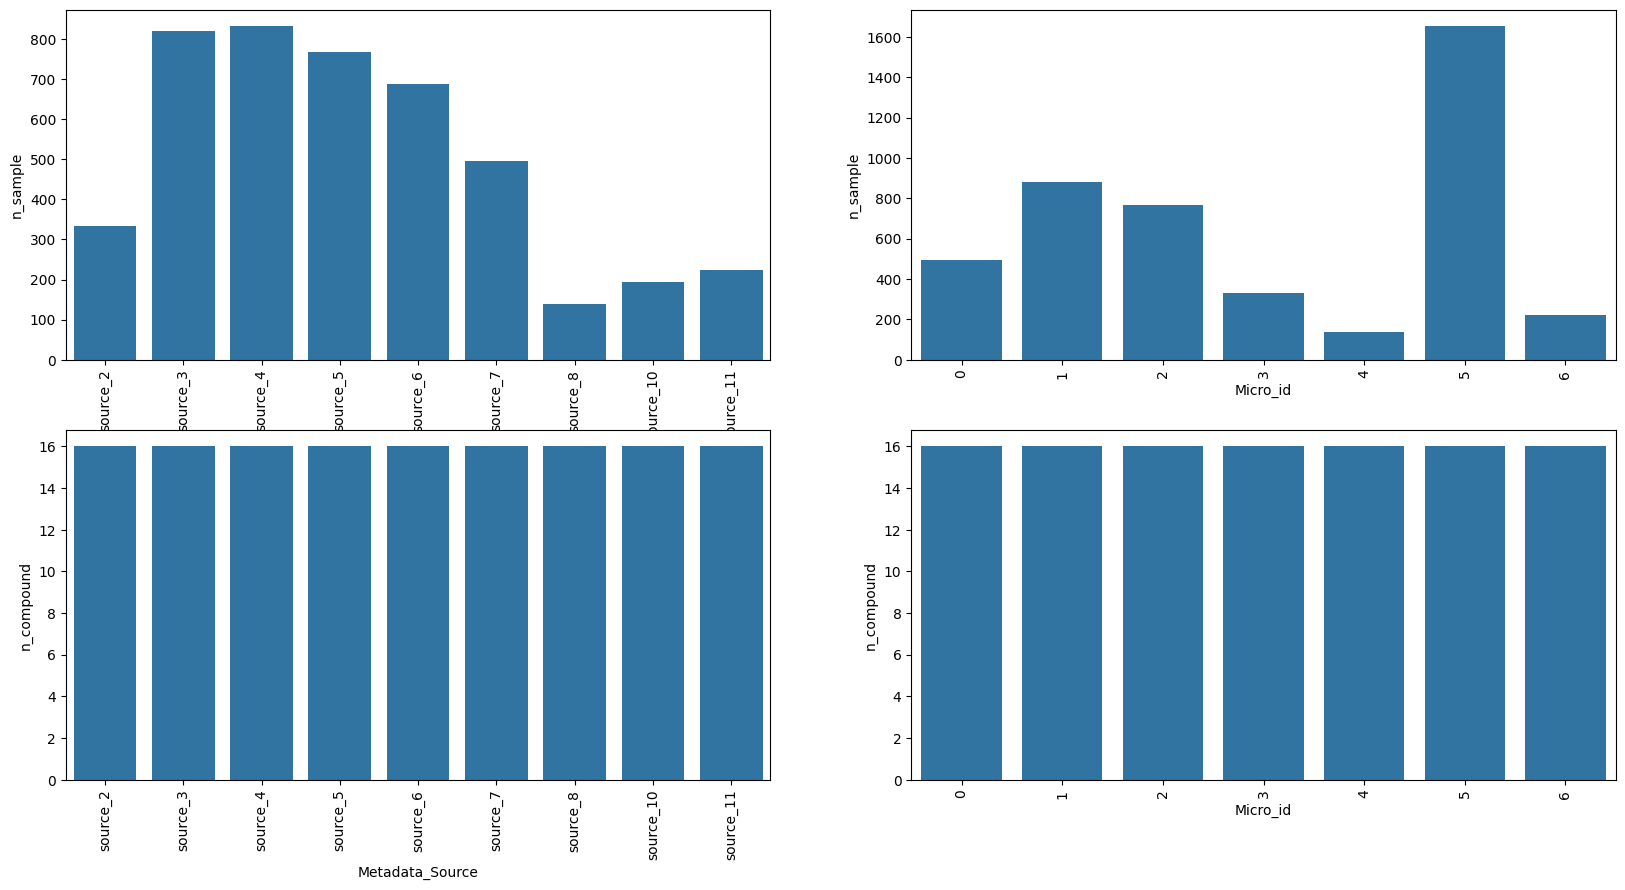

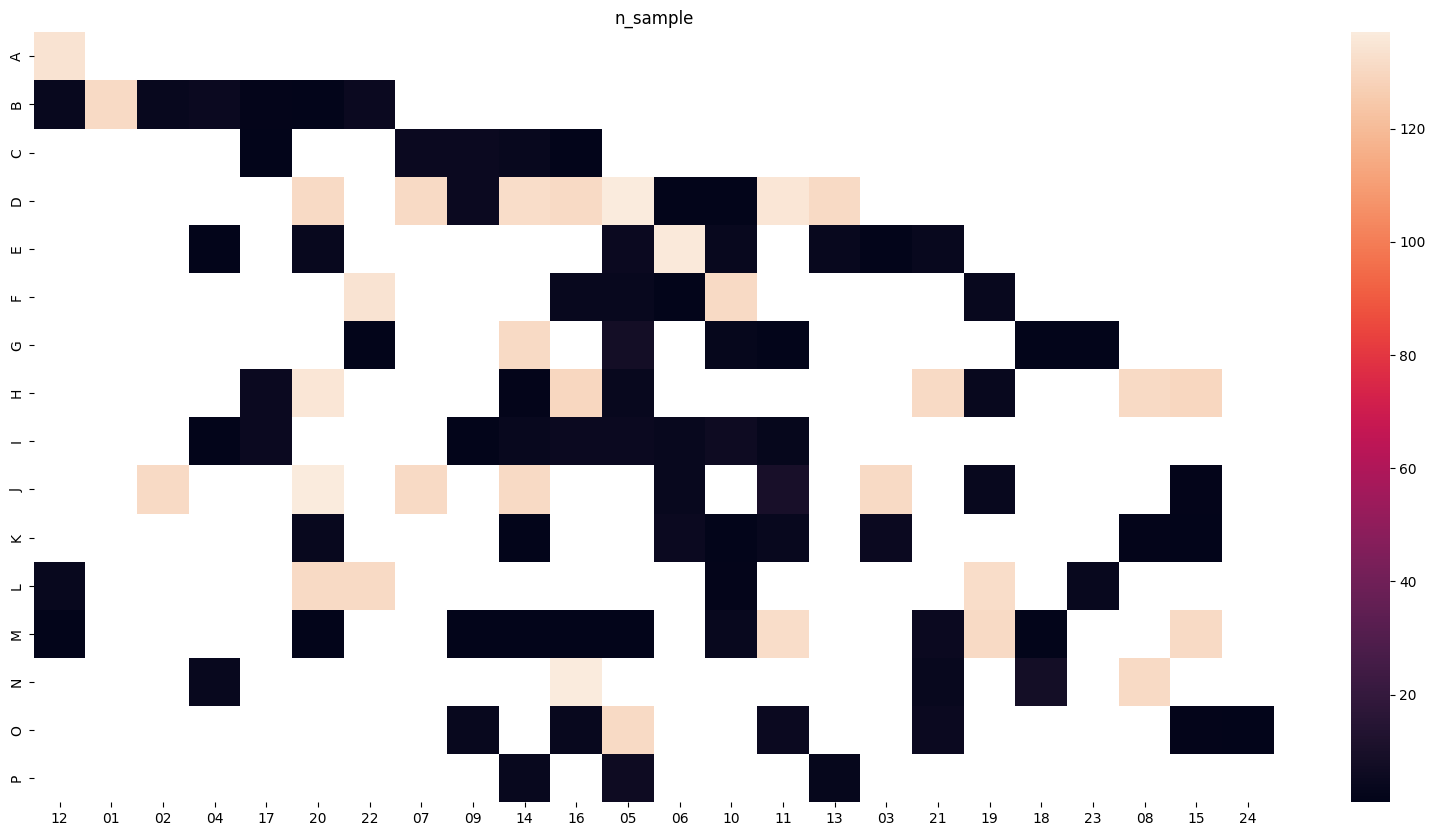

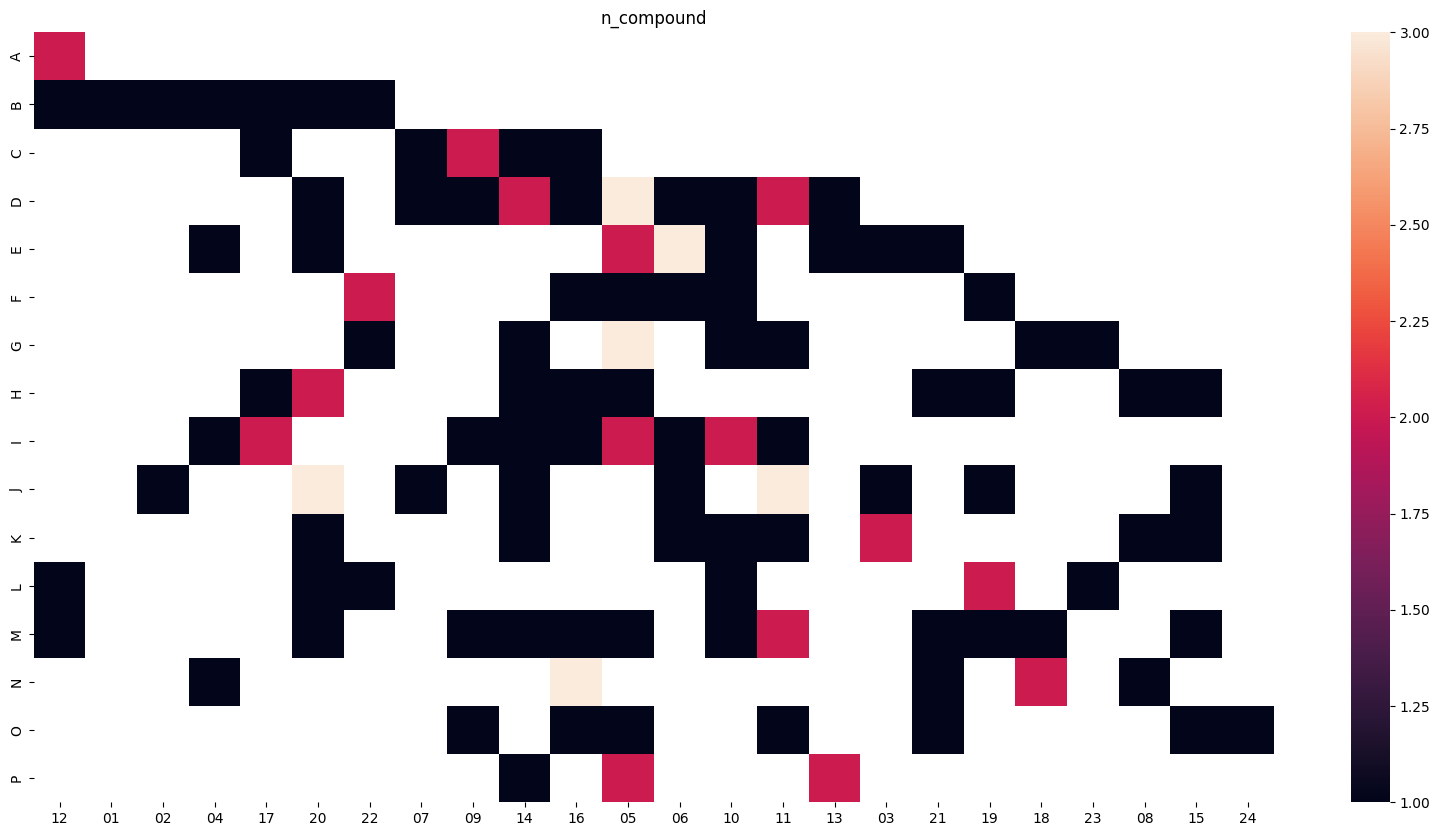

In [654]:
show_distribution(merge_table.filter(pl.col("Metadata_JCP2022").is_in(between1_name)))

In [655]:
merge_table_between1 = (merge_table.filter(
    pl.col("Metadata_JCP2022").is_in(between1_name))
.sort(by=["Metadata_Source", "Metadata_JCP2022", "Metadata_Plate", "Metadata_Well", "Metadata_Batch"]))

merge_table_between_keep1 = (merge_table_between1.group_by("Metadata_Source")
     .agg(pl.struct(pl.col("Metadata_JCP2022", "Metadata_Plate", "Metadata_Well", "Metadata_Batch"))
          .sort()
          .sample(90, seed=seed))
     .sort(by="Metadata_Source")
    .explode("Metadata_JCP2022")
    .unnest("Metadata_JCP2022"))

In [656]:
merge_table_between1 = (merge_table_between1.join(merge_table_between_keep1,
                         on=["Metadata_Source","Metadata_JCP2022", "Metadata_Plate", 
                             "Metadata_Well", "Metadata_Batch"],
                         how="inner"))

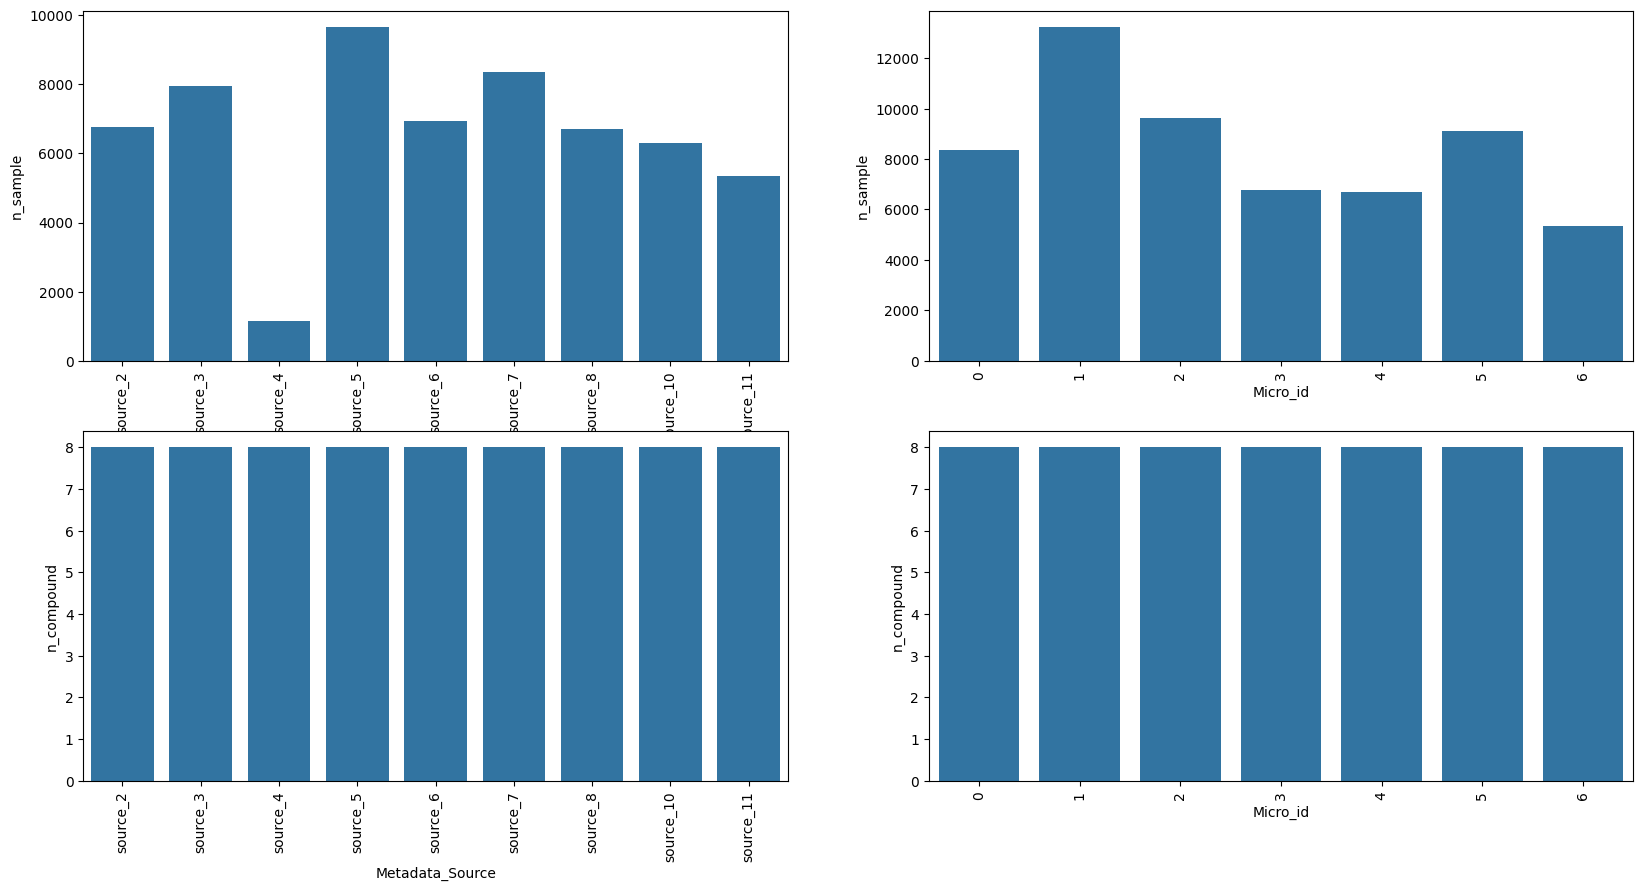

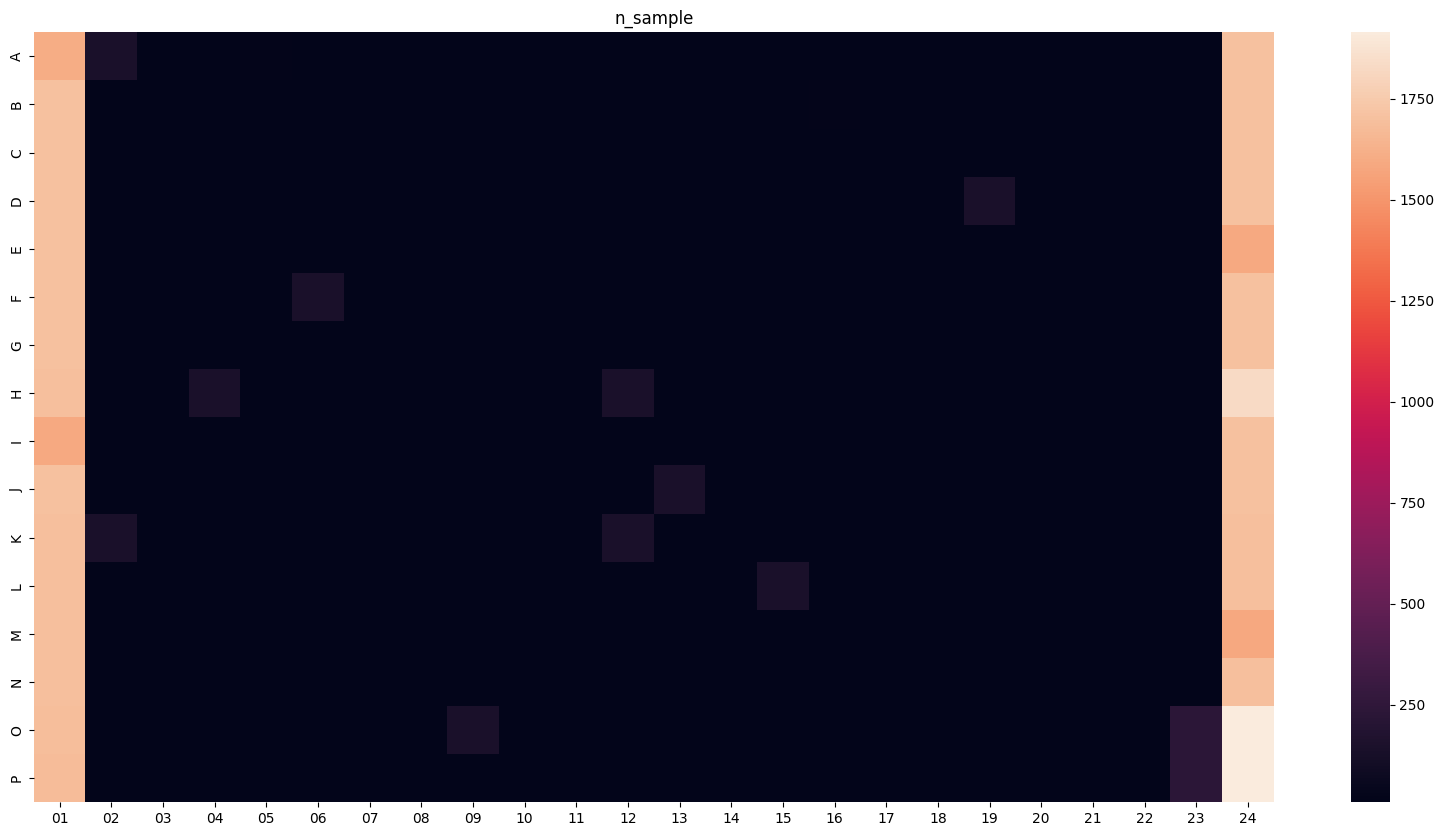

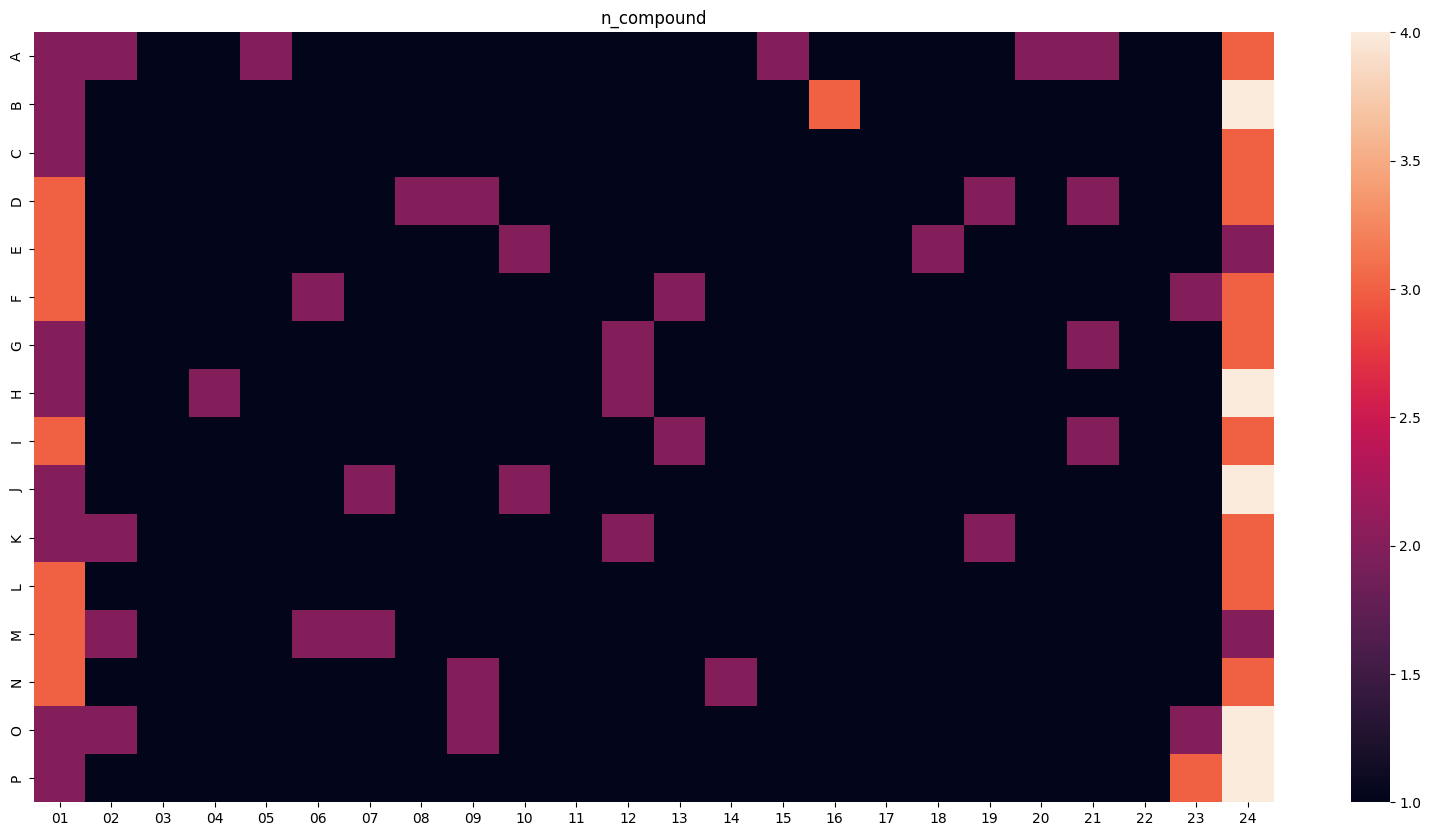

In [657]:
show_distribution(merge_table.filter(pl.col("Metadata_JCP2022").is_in(between2_name)))

In [658]:
merge_table_between2 = (merge_table.filter(
    pl.col("Metadata_JCP2022").is_in(between2_name))
.sort(by=["Metadata_Source", "Metadata_JCP2022", "Metadata_Plate", "Metadata_Well", "Metadata_Batch"]))

merge_table_between_keep2 = (merge_table_between2.group_by("Metadata_Source")
     .agg(pl.struct(pl.col("Metadata_JCP2022", "Metadata_Plate", "Metadata_Well", "Metadata_Batch"))
          .sort()
          .sample(90, seed=seed))
     .sort(by="Metadata_Source")
    .explode("Metadata_JCP2022")
    .unnest("Metadata_JCP2022"))

In [659]:
merge_table_between2 = (merge_table_between2.join(merge_table_between_keep2,
                         on=["Metadata_Source","Metadata_JCP2022", "Metadata_Plate", 
                             "Metadata_Well", "Metadata_Batch"],
                         how="inner"))

### e) Down Sampling of treatment

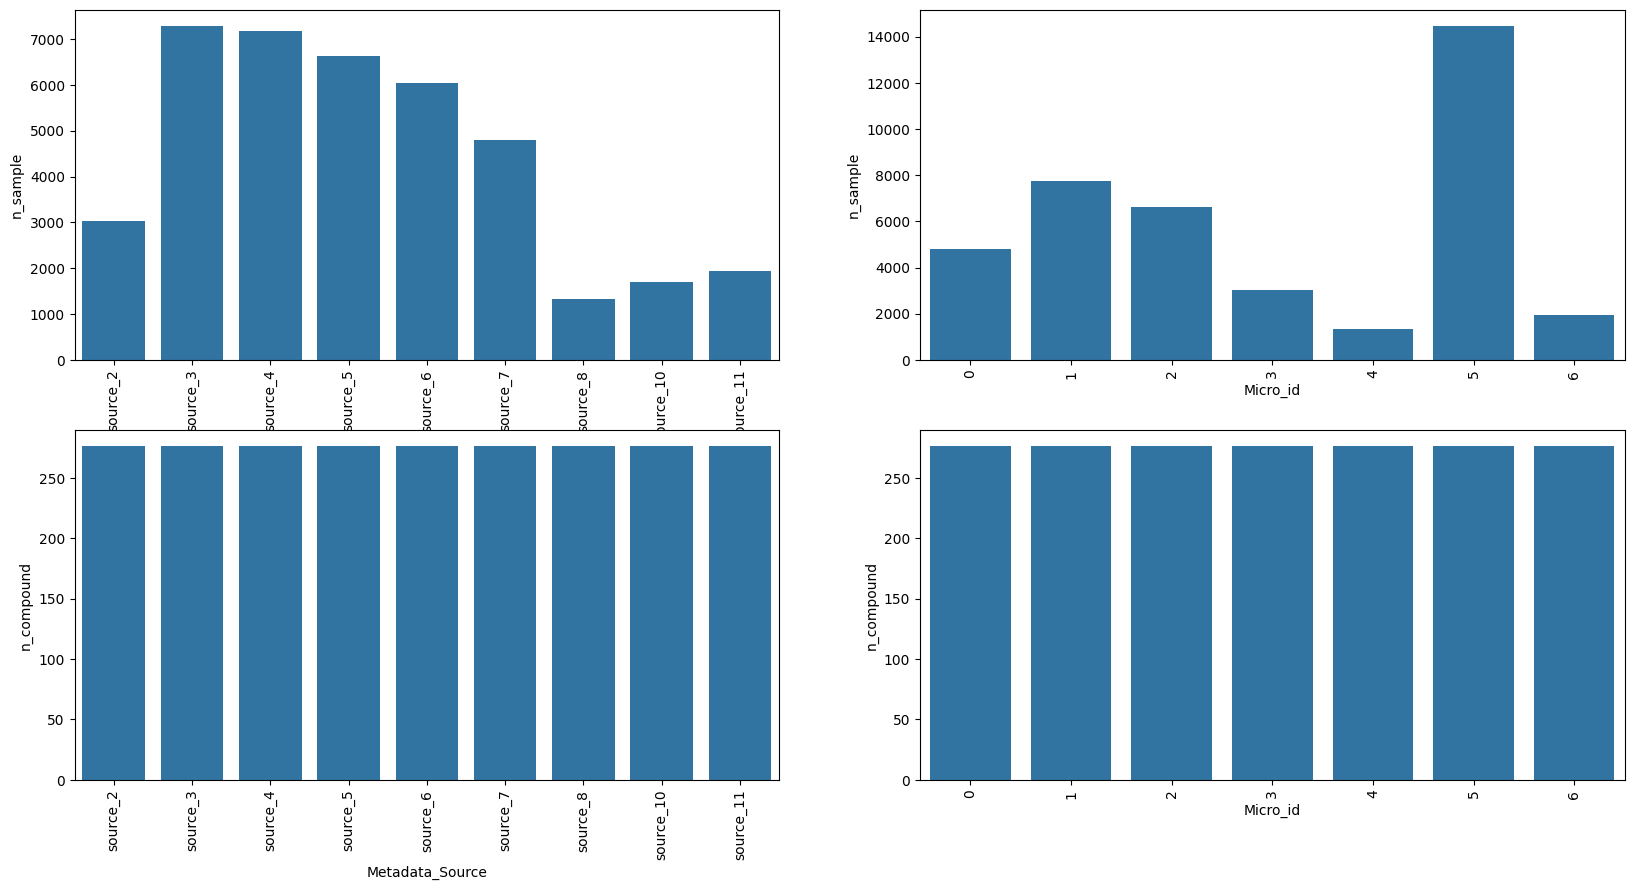

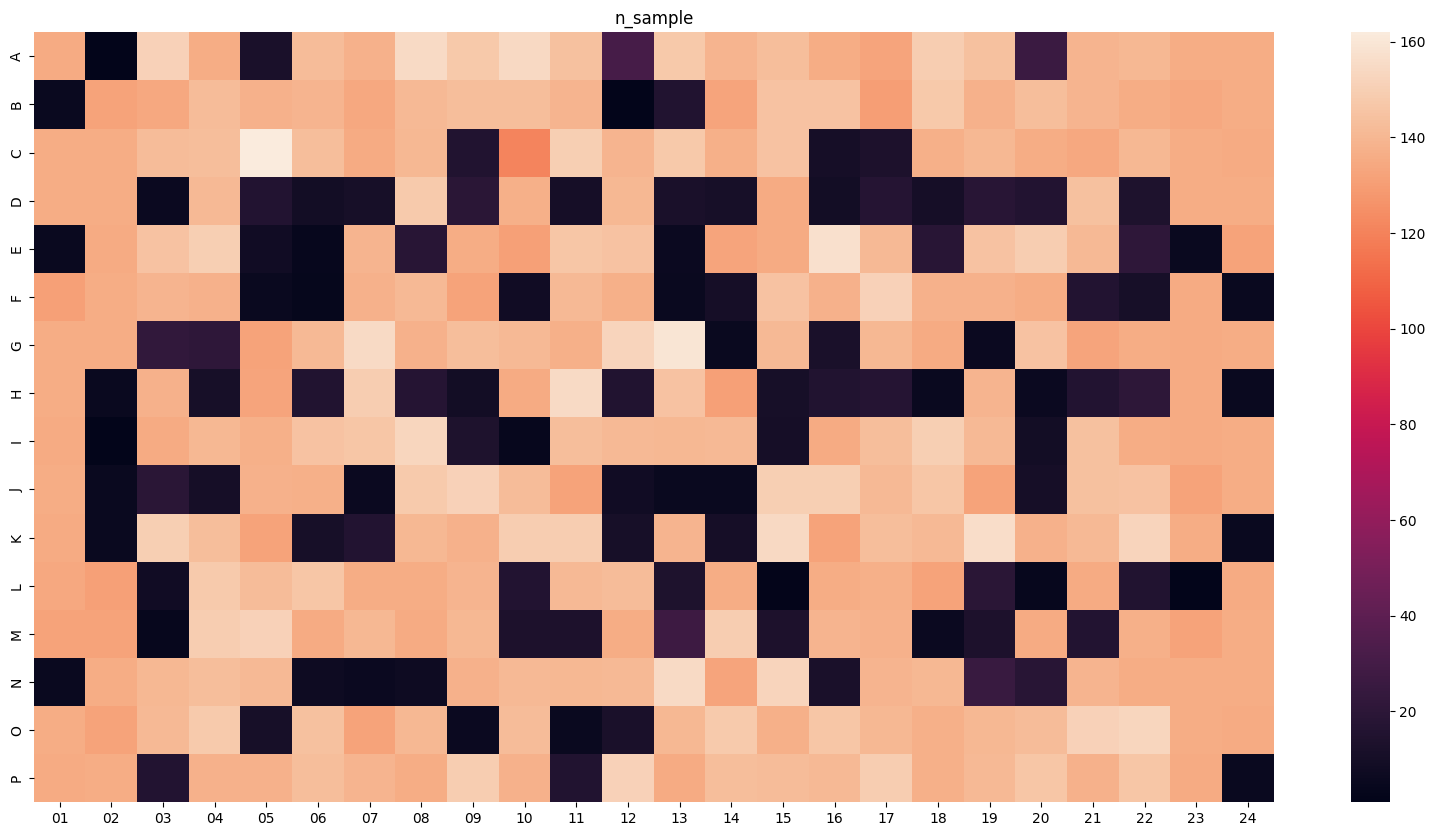

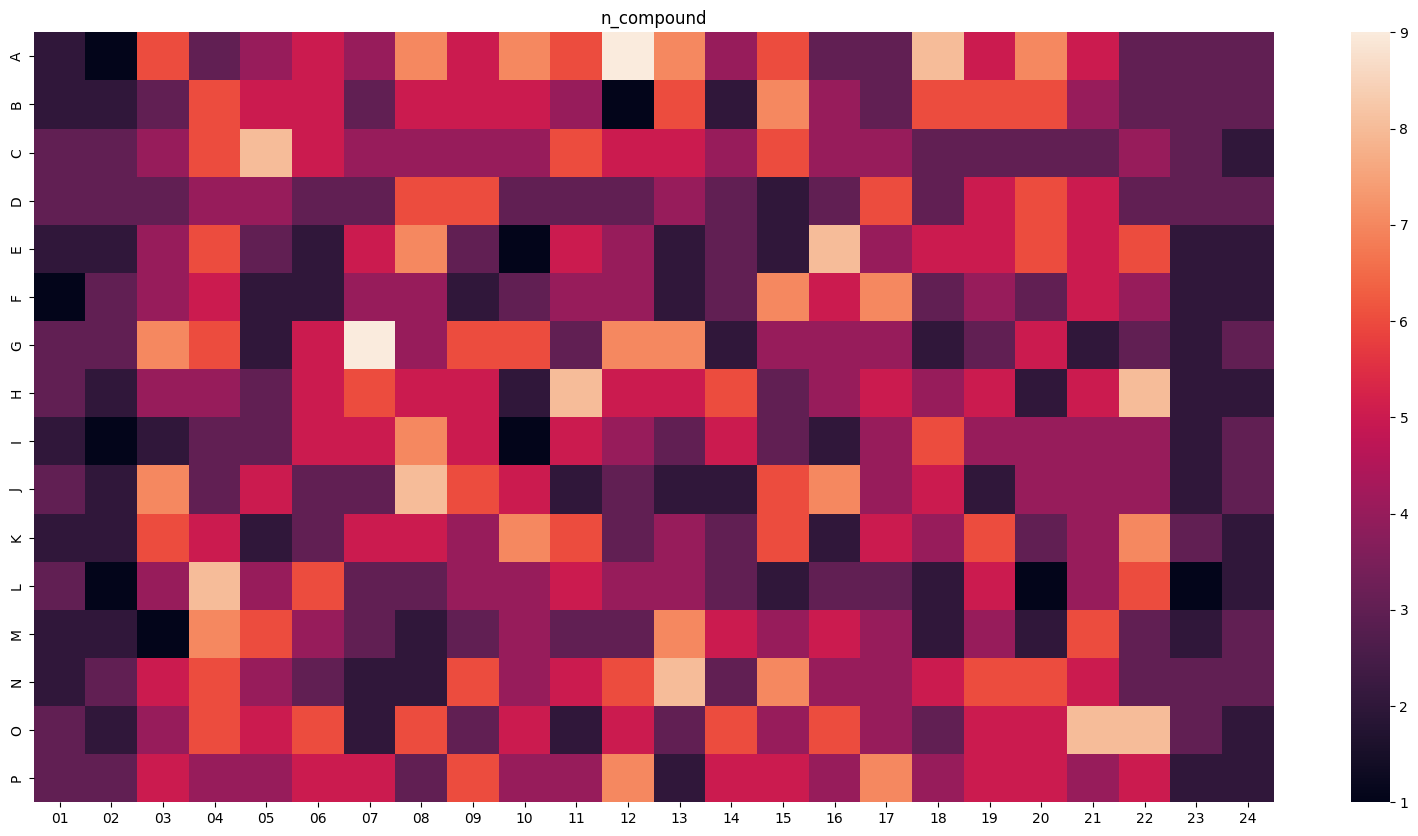

In [660]:
show_distribution(merge_table.filter(pl.col("Metadata_JCP2022").is_in(trt_name)))

In [661]:
merge_table_trt = (merge_table.filter(
    pl.col("Metadata_JCP2022").is_in(trt_name))
.filter(
    pl.col("Metadata_Source").str.contains("_8$") != True)
.sort(by=["Metadata_Source", "Metadata_JCP2022", "Metadata_Plate", "Metadata_Well", "Metadata_Batch"]))

merge_table_trt_keep = (merge_table_trt.group_by("Metadata_Source")
     .agg(pl.struct(pl.col("Metadata_JCP2022", "Metadata_Plate", "Metadata_Well", "Metadata_Batch"))
          .sort()
          .sample(1350, seed=seed))
     .sort(by="Metadata_Source")
    .explode("Metadata_JCP2022")
    .unnest("Metadata_JCP2022"))

In [662]:
merge_table_trt = (merge_table_trt.join(merge_table_trt_keep,
                         on=["Metadata_Source","Metadata_JCP2022", "Metadata_Plate", 
                             "Metadata_Well", "Metadata_Batch"],
                         how="inner")
                       .join((merge_table.filter(
                           pl.col("Metadata_JCP2022").is_in(trt_name))
                              .filter(
                                  pl.col("Metadata_Source").str.contains("_8$"))),
                             on=merge_table.columns,
                             how="outer")).unique()

### f) merging all group sampled

In [663]:
merge_table_filtered = (merge_table_trt.join(
                        merge_table_between1,
                        on=merge_table_trt.columns,
                        how="outer")
                     .join(merge_table_between2,
                           on=merge_table_trt.columns,
                           how="outer")
                     .join(merge_table_control,
                           on=merge_table_trt.columns,
                           how="outer"))
    

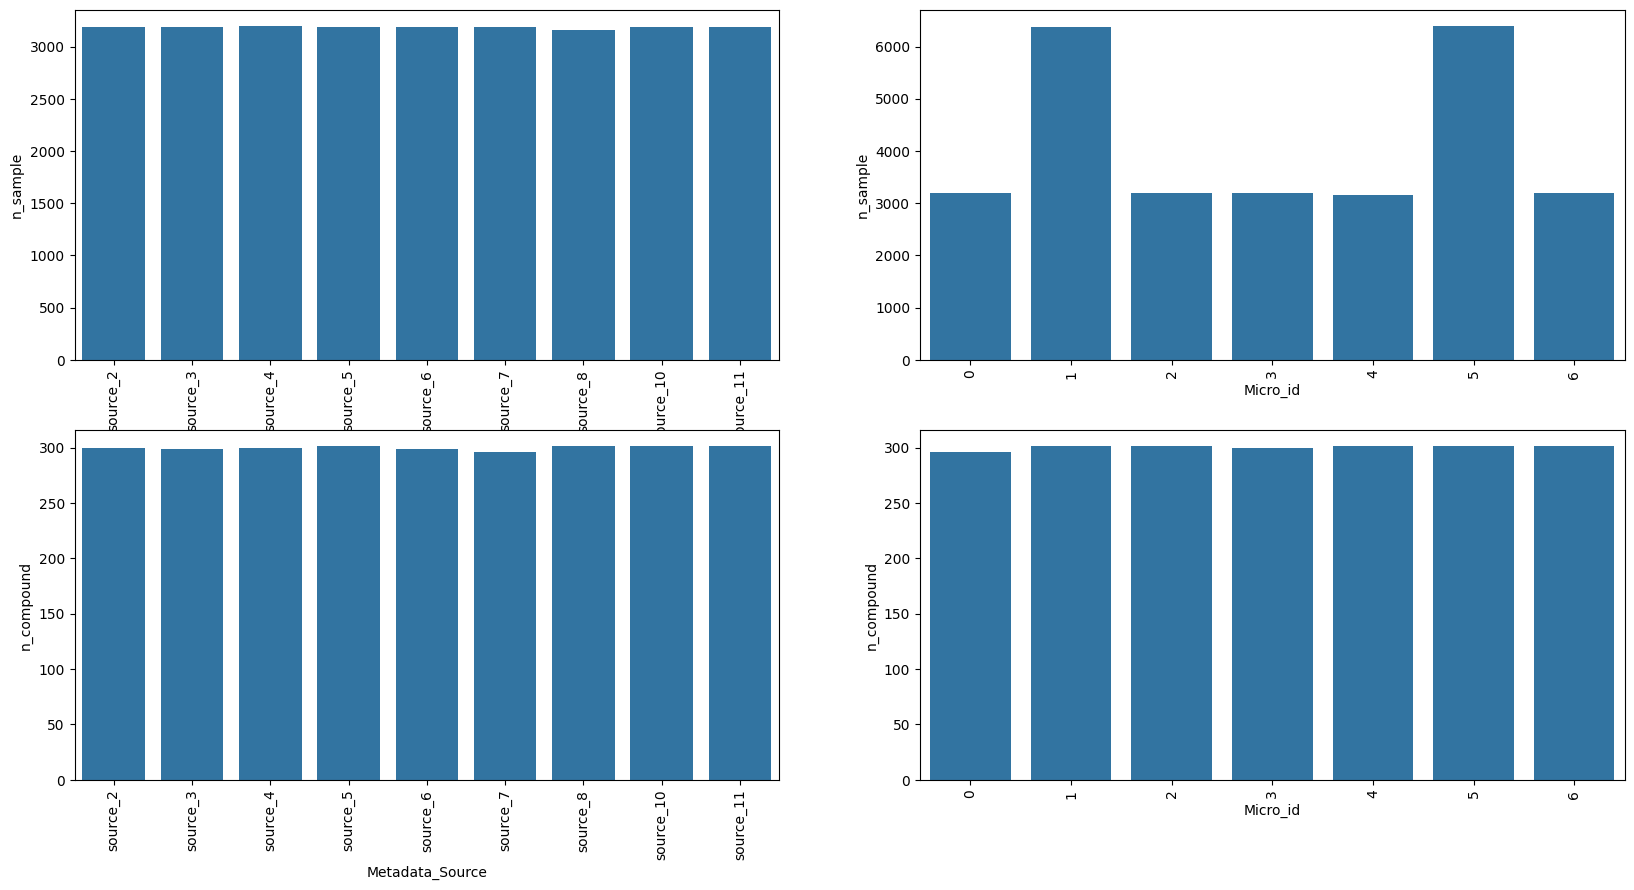

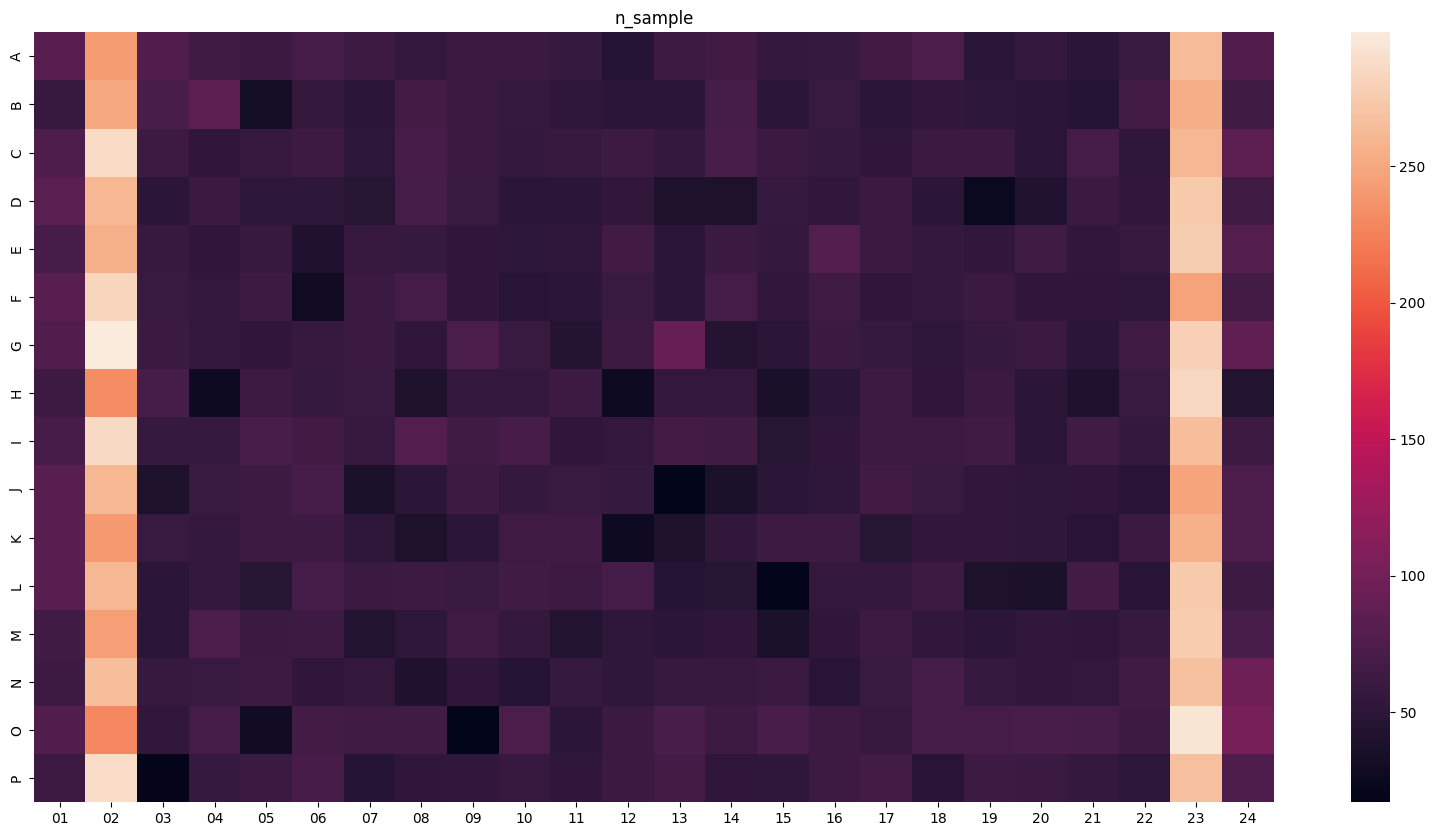

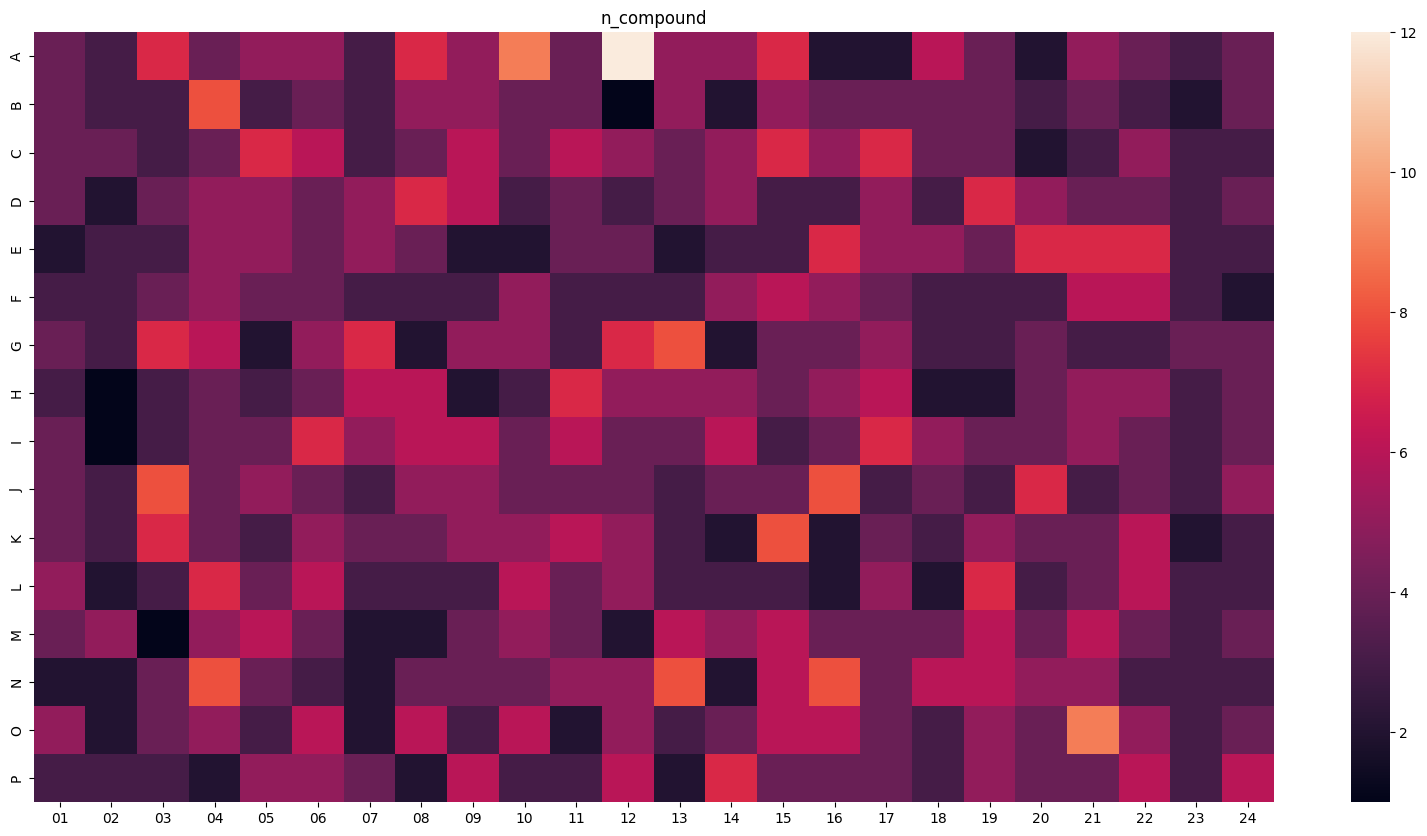

In [664]:
show_distribution(merge_table_filtered)

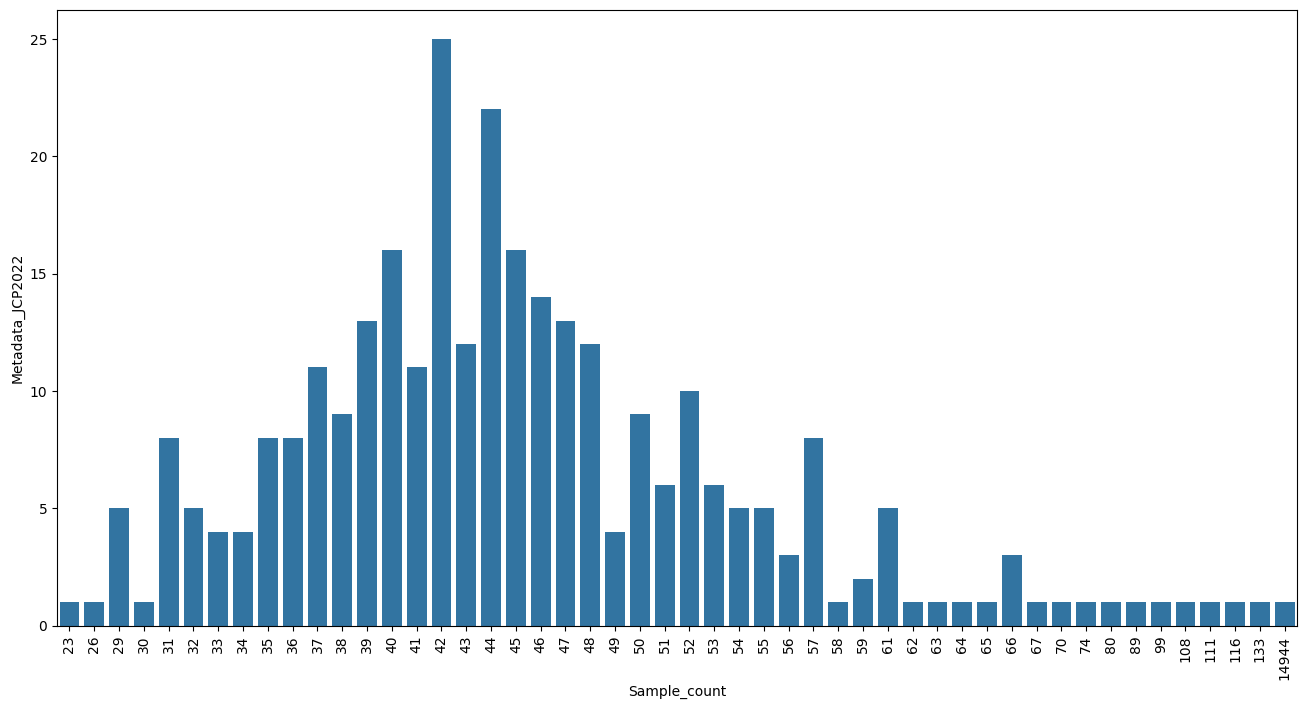

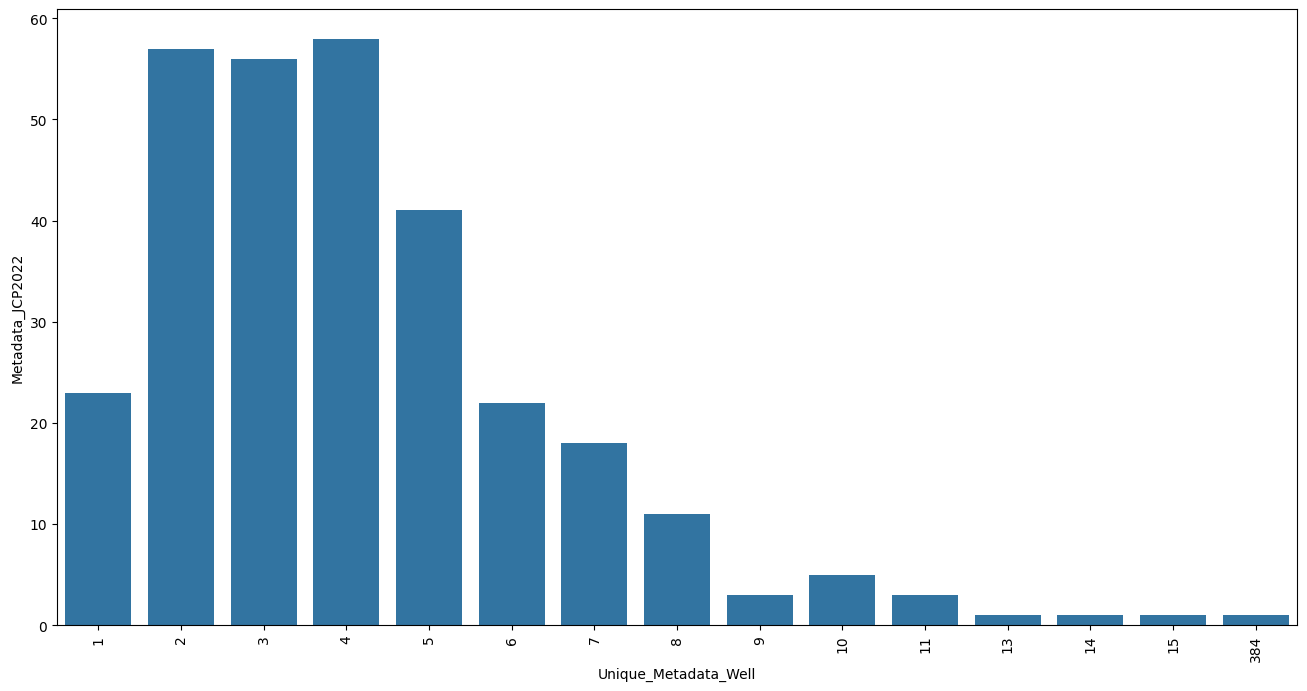

In [665]:
compounds_info_filtered = (merge_table_filtered.group_by("Metadata_JCP2022")
                  .agg(pl.col("Metadata_InChIKey").count().alias("Sample_count"),
                       pl.col("Metadata_Source", "Metadata_Well", "Micro_id")
                       .n_unique().name.prefix("Unique_"))
                       )

fig, ax1 = plt.subplots(1, figsize=(16,8))

df_filtered = (compounds_info_filtered.group_by("Sample_count")
             .agg(pl.col("Metadata_JCP2022").n_unique()).sort(by="Sample_count"))

sns.barplot(df_filtered,
            x="Sample_count",
            y="Metadata_JCP2022",
            ax=ax1)
ax1.tick_params(axis='x', rotation=90)

fig, ax2 = plt.subplots(1, figsize=(16,8))

df2_filtered = (compounds_info_filtered.group_by("Unique_Metadata_Well")
             .agg(pl.col("Metadata_JCP2022").n_unique()).sort(by="Unique_Metadata_Well"))

sns.barplot(df2_filtered,
            x="Unique_Metadata_Well",
            y="Metadata_JCP2022",
            ax=ax2)
ax2.tick_params(axis='x', rotation=90)

### g) Let's see if some compounds has disapeared from sources and how to put them back in a meaningful way

#### Count of Sample per source per compound
#### Count of Unique Well per source per compound
Let's compute these metric without considering the control compounds.

Text(0.5, 1.0, 'Count of Unique Well per source per compound')

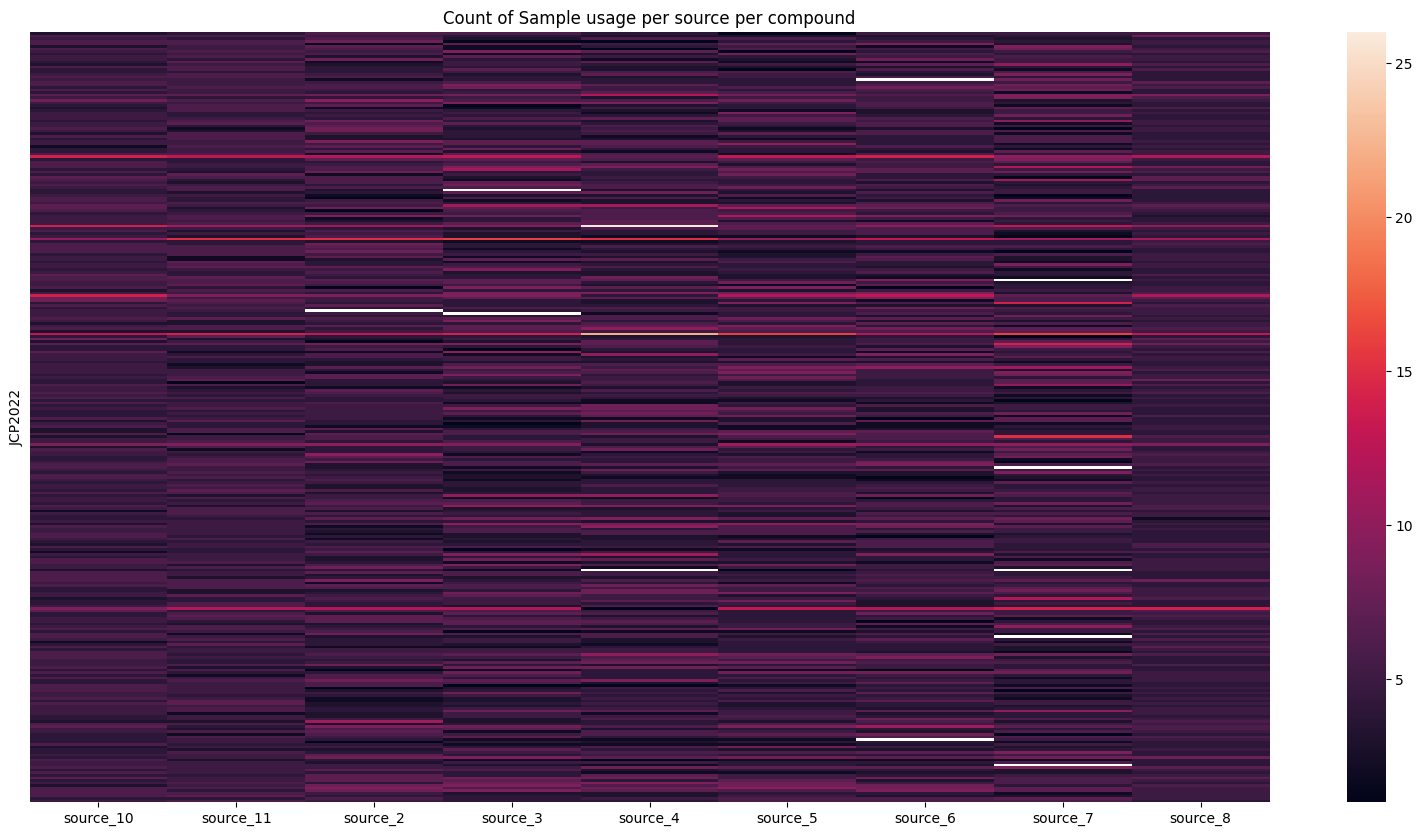

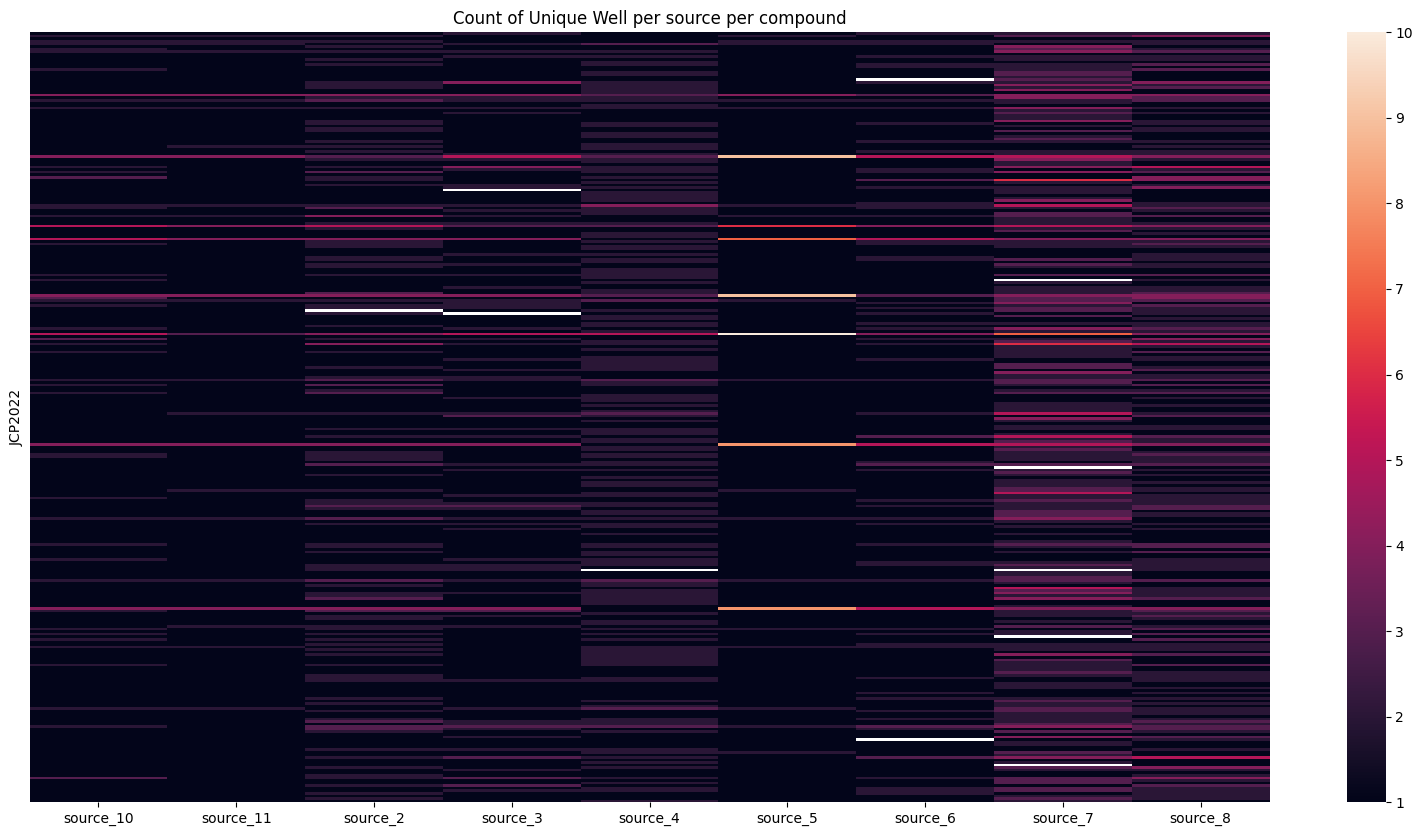

In [666]:
well_p_source_p_compound = (merge_table_filtered.filter(pl.col("Metadata_JCP2022").is_in(controle_name) != True)
                            .group_by(["Metadata_JCP2022", "Metadata_Source"])
 .agg(pl.col("Metadata_JCP2022").count().alias("n_sample"),
      pl.col("Metadata_Well").n_unique().alias("n_well_unique"))
 .sort(by=["Metadata_JCP2022", "Metadata_Source"]))

count_sample_p_source_p_compound = well_p_source_p_compound.pivot(index="Metadata_JCP2022",
                                                                 columns="Metadata_Source",
                                                                 values="n_sample")

unique_well_p_source_p_compound = well_p_source_p_compound.pivot(index="Metadata_JCP2022",
                                                                 columns="Metadata_Source",
                                                                 values="n_well_unique")

fig1, ax1 = plt.subplots(1, figsize=(20,10))
sns.heatmap(count_sample_p_source_p_compound.select(pl.all().exclude("Metadata_JCP2022")),
            ax=ax1)

ax1.set_xticklabels(count_sample_p_source_p_compound.columns[1:])
ax1.tick_params(left = False, labelleft = False)
ax1.set_ylabel("JCP2022")
ax1.set_title("Count of Sample usage per source per compound")

fig2, ax2 = plt.subplots(1, figsize=(20,10))
sns.heatmap(unique_well_p_source_p_compound.select(pl.all().exclude("Metadata_JCP2022")),
            ax=ax2)
           #robust=True)
ax2.set_xticklabels(unique_well_p_source_p_compound.columns[1:])
ax2.tick_params(left = False, labelleft = False)
ax2.set_ylabel("JCP2022")
ax2.set_title("Count of Unique Well per source per compound")

### h) Last Concerns: adding back removed sample from some sources
* Some compounds are not anymore in some sources, let's add them artificially by comparing with the data unfiltered. 

Text(0.5, 1.0, 'Count of Unique Well per source per compound')

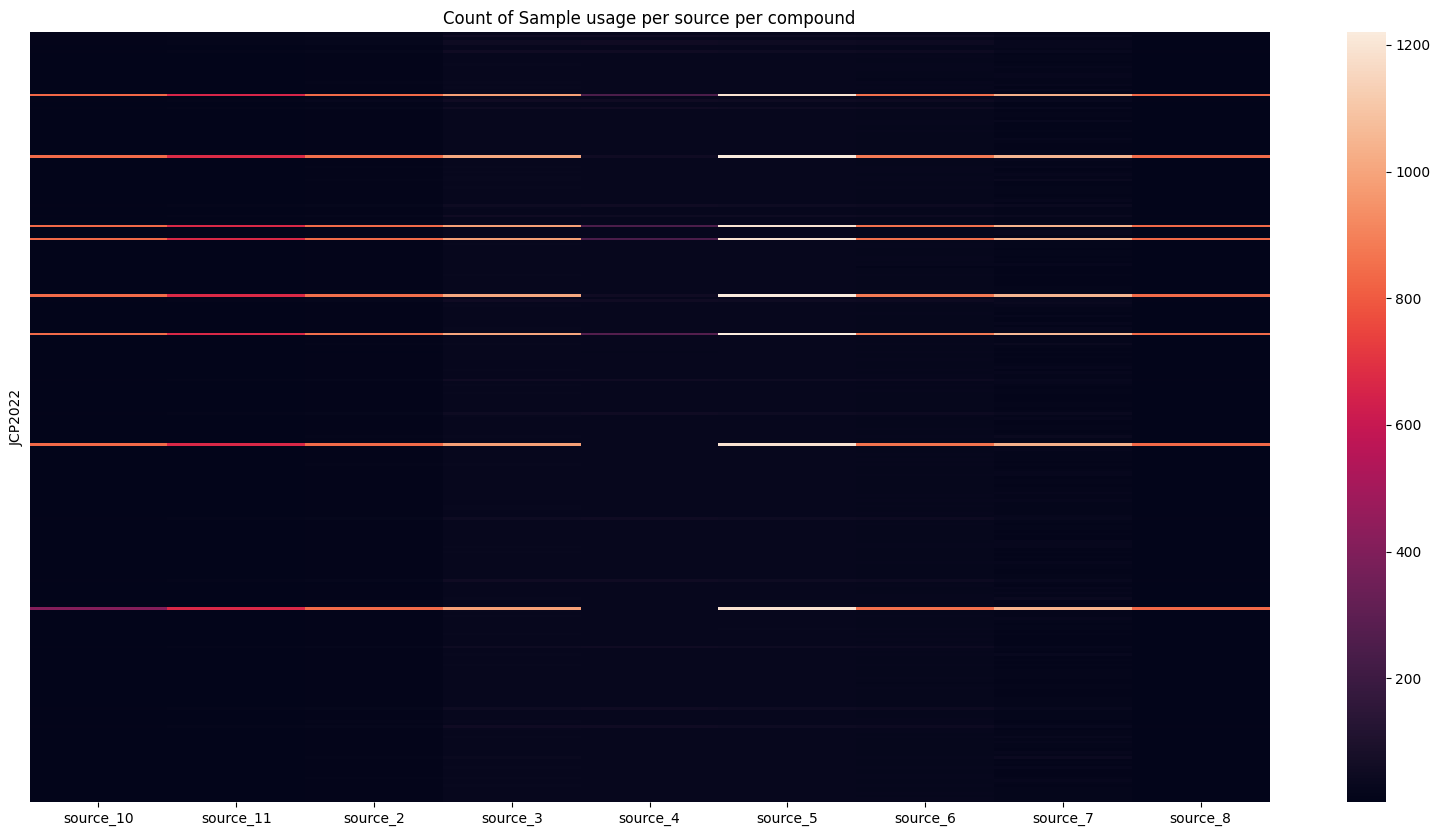

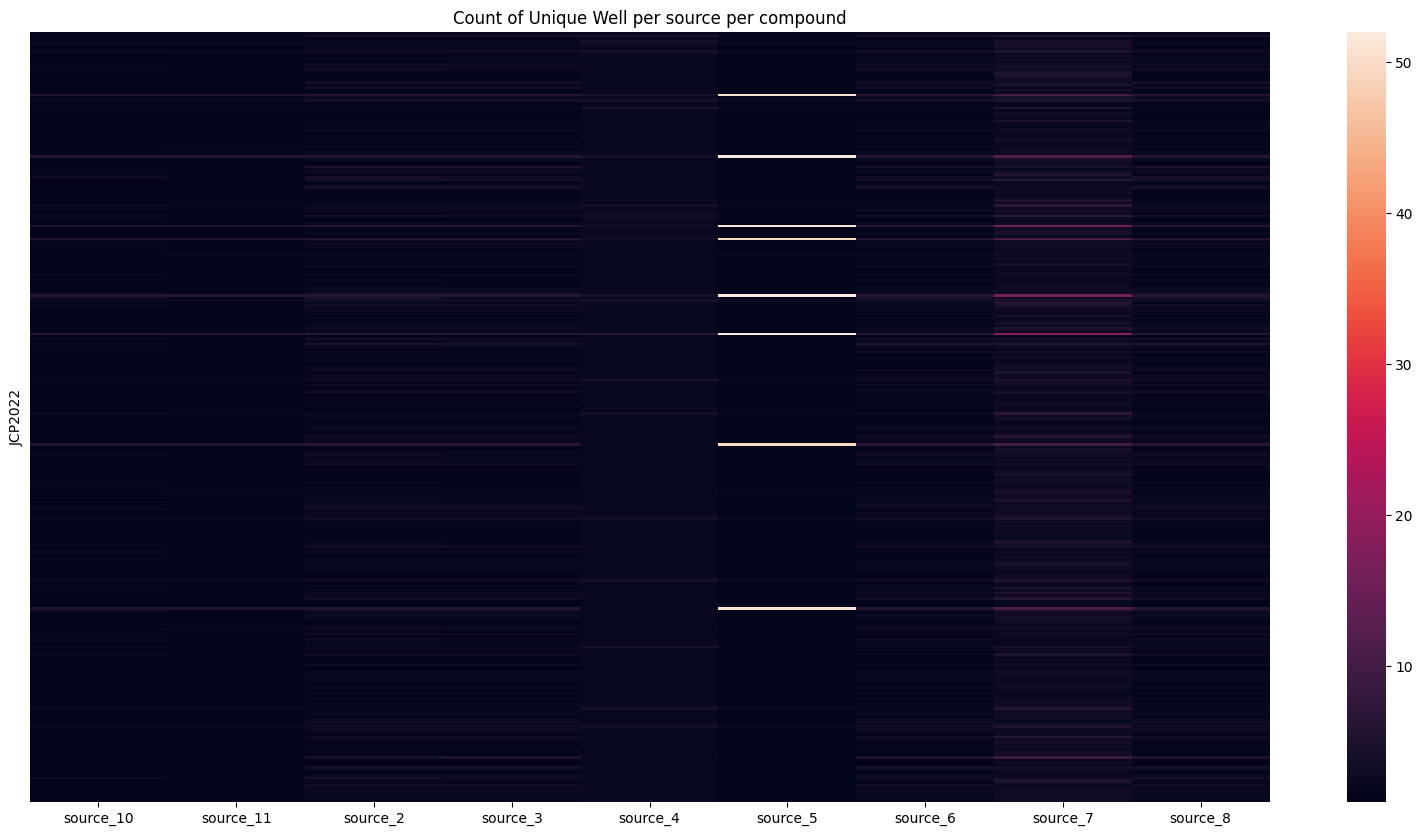

In [667]:
well_p_source_p_compound_raw = (merge_table.filter(pl.col("Metadata_JCP2022").is_in(controle_name) != True)
                            .group_by(["Metadata_JCP2022", "Metadata_Source"])
 .agg(pl.col("Metadata_JCP2022").count().alias("n_sample"),
      pl.col("Metadata_Well").n_unique().alias("n_well_unique"))
 .sort(by=["Metadata_JCP2022", "Metadata_Source"]))

count_sample_p_source_p_compound_raw = well_p_source_p_compound_raw.pivot(index="Metadata_JCP2022",
                                                                 columns="Metadata_Source",
                                                                 values="n_sample")

unique_well_p_source_p_compound_raw = well_p_source_p_compound_raw.pivot(index="Metadata_JCP2022",
                                                                 columns="Metadata_Source",
                                                                 values="n_well_unique")

fig1, ax1 = plt.subplots(1, figsize=(20,10))
sns.heatmap(count_sample_p_source_p_compound_raw.select(pl.all().exclude("Metadata_JCP2022")),
            ax=ax1)

ax1.set_xticklabels(count_sample_p_source_p_compound_raw.columns[1:])
ax1.tick_params(left = False, labelleft = False)
ax1.set_ylabel("JCP2022")
ax1.set_title("Count of Sample usage per source per compound")

fig2, ax2 = plt.subplots(1, figsize=(20,10))
sns.heatmap(unique_well_p_source_p_compound_raw.select(pl.all().exclude("Metadata_JCP2022")),
            ax=ax2)
           #robust=True)
ax2.set_xticklabels(unique_well_p_source_p_compound_raw.columns[1:])
ax2.tick_params(left = False, labelleft = False)
ax2.set_ylabel("JCP2022")
ax2.set_title("Count of Unique Well per source per compound")

In [668]:
#This table compare the amount of sample and unique well use per source and per compounds
well_p_source_p_compound_comp = (well_p_source_p_compound_raw.join(
    well_p_source_p_compound,
    on=["Metadata_JCP2022","Metadata_Source"],
    how="outer",
    suffix="_filter"))
well_p_source_p_compound_comp.head()

shape: (5, 6)
┌─────────────────┬─────────────────┬──────────┬───────────────┬─────────────────┬─────────────────┐
│ Metadata_JCP202 ┆ Metadata_Source ┆ n_sample ┆ n_well_unique ┆ n_sample_filter ┆ n_well_unique_f │
│ 2               ┆ ---             ┆ ---      ┆ ---           ┆ ---             ┆ ilter           │
│ ---             ┆ str             ┆ u32      ┆ u32           ┆ u32             ┆ ---             │
│ str             ┆                 ┆          ┆               ┆                 ┆ u32             │
╞═════════════════╪═════════════════╪══════════╪═══════════════╪═════════════════╪═════════════════╡
│ JCP2022_000794  ┆ source_10       ┆ 6        ┆ 1             ┆ 3               ┆ 1               │
│ JCP2022_000794  ┆ source_11       ┆ 7        ┆ 1             ┆ 4               ┆ 1               │
│ JCP2022_000794  ┆ source_2        ┆ 11       ┆ 2             ┆ 6               ┆ 1               │
│ JCP2022_000794  ┆ source_3        ┆ 27       ┆ 2             ┆ 6               ┆ 2               │
│ JCP2022_000794  ┆ source_4        ┆ 26       ┆ 2             ┆ 4               ┆ 1               │
└─────────────────┴─────────────────┴──────────┴───────────────┴─────────────────┴─────────────────┘

Let's compute in average the amount of sample and amount of unique well there is per compounds and per sources
In this way instead of just putting back on sample for each compounds missing in some sources, we add back a coherent amount of samples and wells relative to the average of what exists for this compound in for the sources.  

In [669]:

Sample_mean_p_source_p_compound_comp = (well_p_source_p_compound_comp.select(
    pl.col("Metadata_JCP2022"),
    pl.col("Metadata_Source"),
    pl.col("n_sample_filter").mean().over("Metadata_Source").alias("Source_mean"),
    pl.col("n_sample_filter").mean().over("Metadata_JCP2022").alias("Compound_mean"))
 .with_columns(((pl.col("Source_mean") + pl.col("Compound_mean"))/2).alias("Sample_mean"))
 .select("Metadata_JCP2022", "Metadata_Source", "Sample_mean"))

Well_mean_p_source_p_compound_comp = (well_p_source_p_compound_comp.select(
    pl.col("Metadata_JCP2022"),
    pl.col("Metadata_Source"),
    pl.col("n_well_unique_filter").mean().over("Metadata_Source").alias("Source_mean"),
    pl.col("n_well_unique_filter").mean().over("Metadata_JCP2022").alias("Compound_mean"))
 .with_columns(((pl.col("Source_mean") + pl.col("Compound_mean"))/2).alias("Well_mean"))
 .select("Metadata_JCP2022", "Metadata_Source", "Well_mean"))

mean_p_source_p_compound = (Sample_mean_p_source_p_compound_comp
                                        .join(Well_mean_p_source_p_compound_comp,
                                          on=["Metadata_JCP2022", "Metadata_Source"],
                                          how="outer"))

mean_p_source_p_compound = mean_p_source_p_compound.with_columns(
    pl.col("Sample_mean").round(0),
    pl.col("Well_mean").round(0))

In [670]:
well_p_source_p_compound_comp = well_p_source_p_compound_comp.with_columns(
    pl.col("n_sample_filter", "n_well_unique_filter").fill_null(pl.lit(0)))

In [671]:
compounds_to_retrieve = (well_p_source_p_compound_comp.filter(
    (pl.col("n_well_unique_filter") == 0))
 .join(mean_p_source_p_compound,
       on=["Metadata_JCP2022", "Metadata_Source"],
       how="inner"))

In [672]:
compounds_to_retrieve

shape: (11, 8)
┌────────────┬────────────┬──────────┬────────────┬────────────┬───────────┬───────────┬───────────┐
│ Metadata_J ┆ Metadata_S ┆ n_sample ┆ n_well_uni ┆ n_sample_f ┆ n_well_un ┆ Sample_me ┆ Well_mean │
│ CP2022     ┆ ource      ┆ ---      ┆ que        ┆ ilter      ┆ ique_filt ┆ an        ┆ ---       │
│ ---        ┆ ---        ┆ u32      ┆ ---        ┆ ---        ┆ er        ┆ ---       ┆ f64       │
│ str        ┆ str        ┆          ┆ u32        ┆ u32        ┆ ---       ┆ f64       ┆           │
│            ┆            ┆          ┆            ┆            ┆ u32       ┆           ┆           │
╞════════════╪════════════╪══════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╡
│ JCP2022_01 ┆ source_6   ┆ 17       ┆ 1          ┆ 0          ┆ 0         ┆ 5.0       ┆ 1.0       │
│ 0382       ┆            ┆          ┆            ┆            ┆           ┆           ┆           │
│ JCP2022_03 ┆ source_3   ┆ 25       ┆ 1          ┆ 0          ┆ 0         ┆ 5.0       ┆ 1.0       │
│ 0713       ┆            ┆          ┆            ┆            ┆           ┆           ┆           │
│ JCP2022_04 ┆ source_7   ┆ 11       ┆ 2          ┆ 0          ┆ 0         ┆ 6.0       ┆ 2.0       │
│ 3332       ┆            ┆          ┆            ┆            ┆           ┆           ┆           │
│ JCP2022_04 ┆ source_2   ┆ 11       ┆ 2          ┆ 0          ┆ 0         ┆ 5.0       ┆ 2.0       │
│ 7545       ┆            ┆          ┆            ┆            ┆           ┆           ┆           │
│ …          ┆ …          ┆ …        ┆ …          ┆ …          ┆ …         ┆ …         ┆ …         │
│ JCP2022_07 ┆ source_7   ┆ 11       ┆ 2          ┆ 0          ┆ 0         ┆ 4.0       ┆ 2.0       │
│ 9617       ┆            ┆          ┆            ┆            ┆           ┆           ┆           │
│ JCP2022_09 ┆ source_7   ┆ 13       ┆ 2          ┆ 0          ┆ 0         ┆ 5.0       ┆ 2.0       │
│ 0051       ┆            ┆          ┆            ┆            ┆           ┆           ┆           │
│ JCP2022_10 ┆ source_6   ┆ 22       ┆ 2          ┆ 0          ┆ 0         ┆ 4.0       ┆ 1.0       │
│ 6219       ┆            ┆          ┆            ┆            ┆           ┆           ┆           │
│ JCP2022_11 ┆ source_7   ┆ 11       ┆ 2          ┆ 0          ┆ 0         ┆ 5.0       ┆ 2.0       │
│ 1730       ┆            ┆          ┆            ┆            ┆           ┆           ┆           │
└────────────┴────────────┴──────────┴────────────┴────────────┴───────────┴───────────┴───────────┘

Sampling 5 per each compounds is reasonnable and simplify the query. 

In [673]:
compounds_to_retrieve_table = merge_table.join((compounds_to_retrieve
.select(pl.col("Metadata_JCP2022", "Metadata_Source"))),
                 on=["Metadata_JCP2022", "Metadata_Source"],
                 how="inner")

In [674]:
compounds_to_retrieve_table_keep = (compounds_to_retrieve_table
                   .sort(by=["Metadata_JCP2022", "Metadata_Source", 
                             "Metadata_Plate", "Metadata_Well", "Metadata_Batch"]))

compounds_to_retrieve_table_keep = (compounds_to_retrieve_table_keep
                                    .group_by("Metadata_JCP2022", "Metadata_Source")
     .agg(pl.struct(pl.col("Metadata_Plate", "Metadata_Well", "Metadata_Batch"))
          .sort()
          .sample(5, seed=seed))
     .sort(by=["Metadata_JCP2022", "Metadata_Source"])
    .explode("Metadata_Plate")
    .unnest("Metadata_Plate"))


compounds_to_retrieve_table = (compounds_to_retrieve_table.join(compounds_to_retrieve_table_keep,
                         on=["Metadata_Source","Metadata_JCP2022", "Metadata_Plate", 
                             "Metadata_Well", "Metadata_Batch"],
                         how="inner"))

In [675]:
merge_table_filtered2 = merge_table_filtered.join(compounds_to_retrieve_table,
                          on=merge_table_filtered.columns,
                          how="outer")

#### i) Final distributions

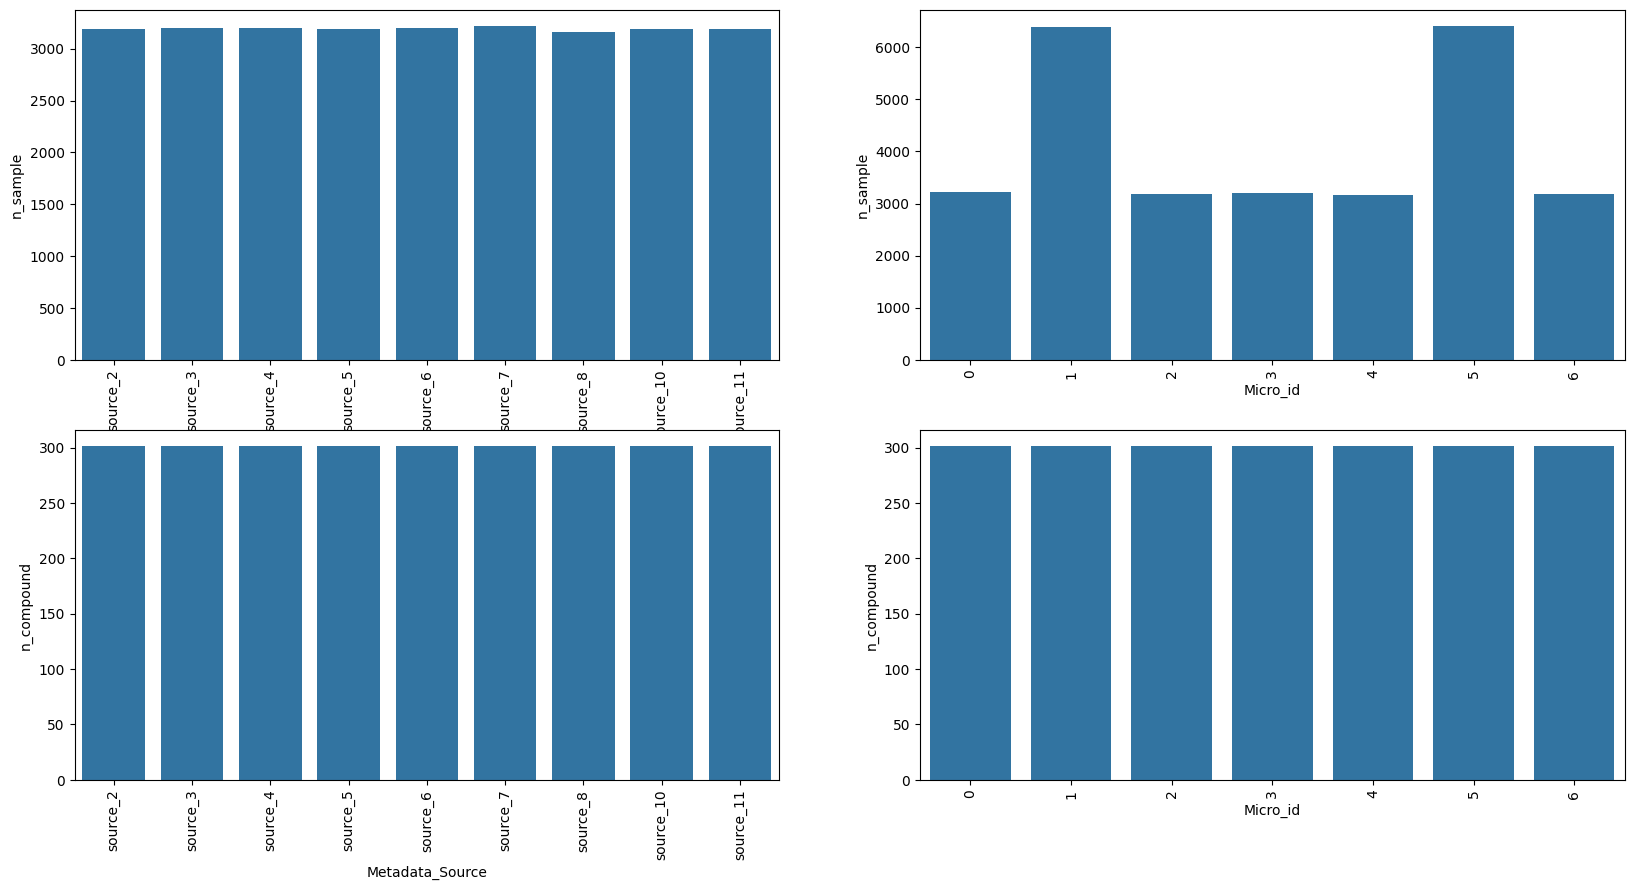

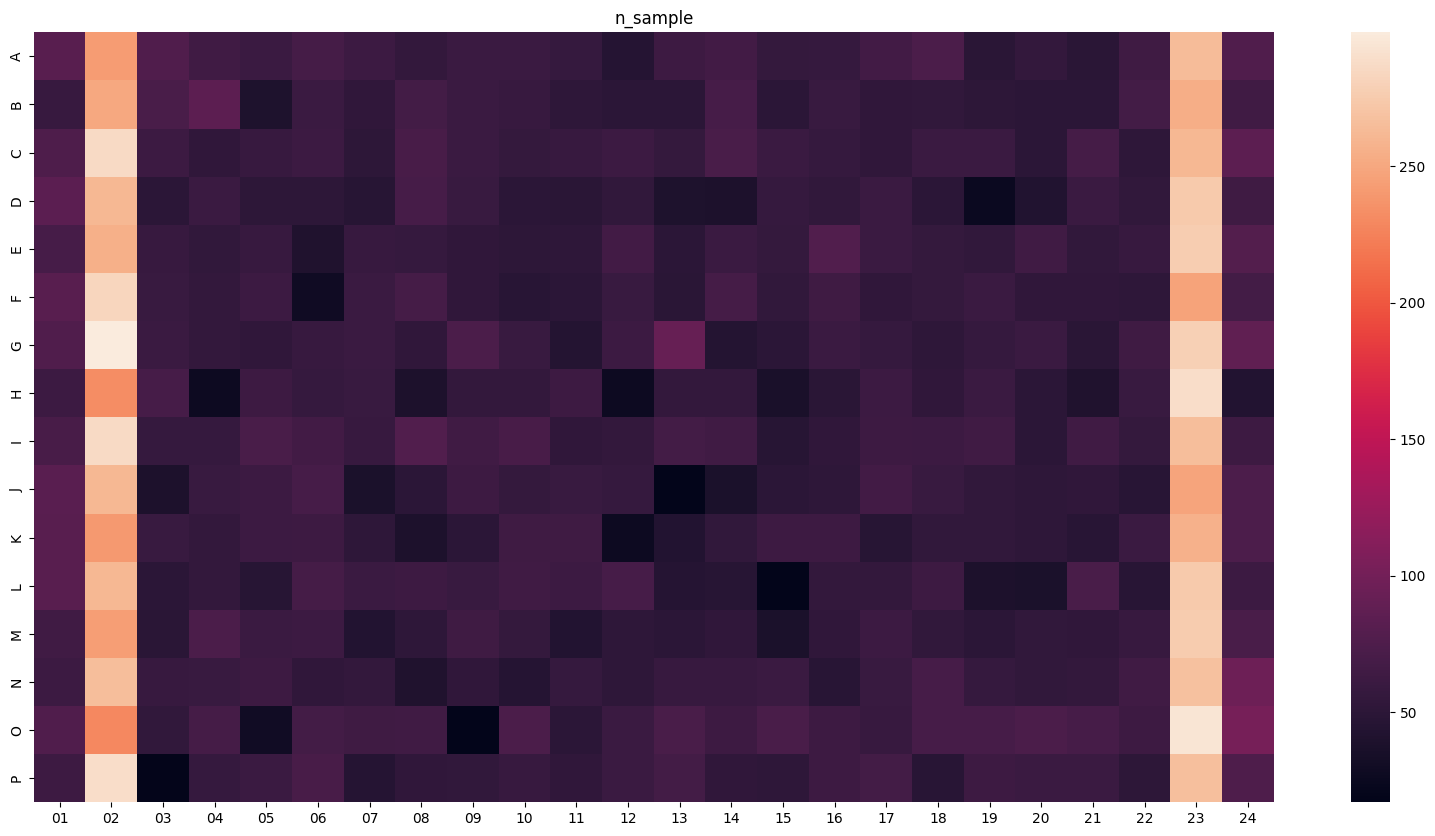

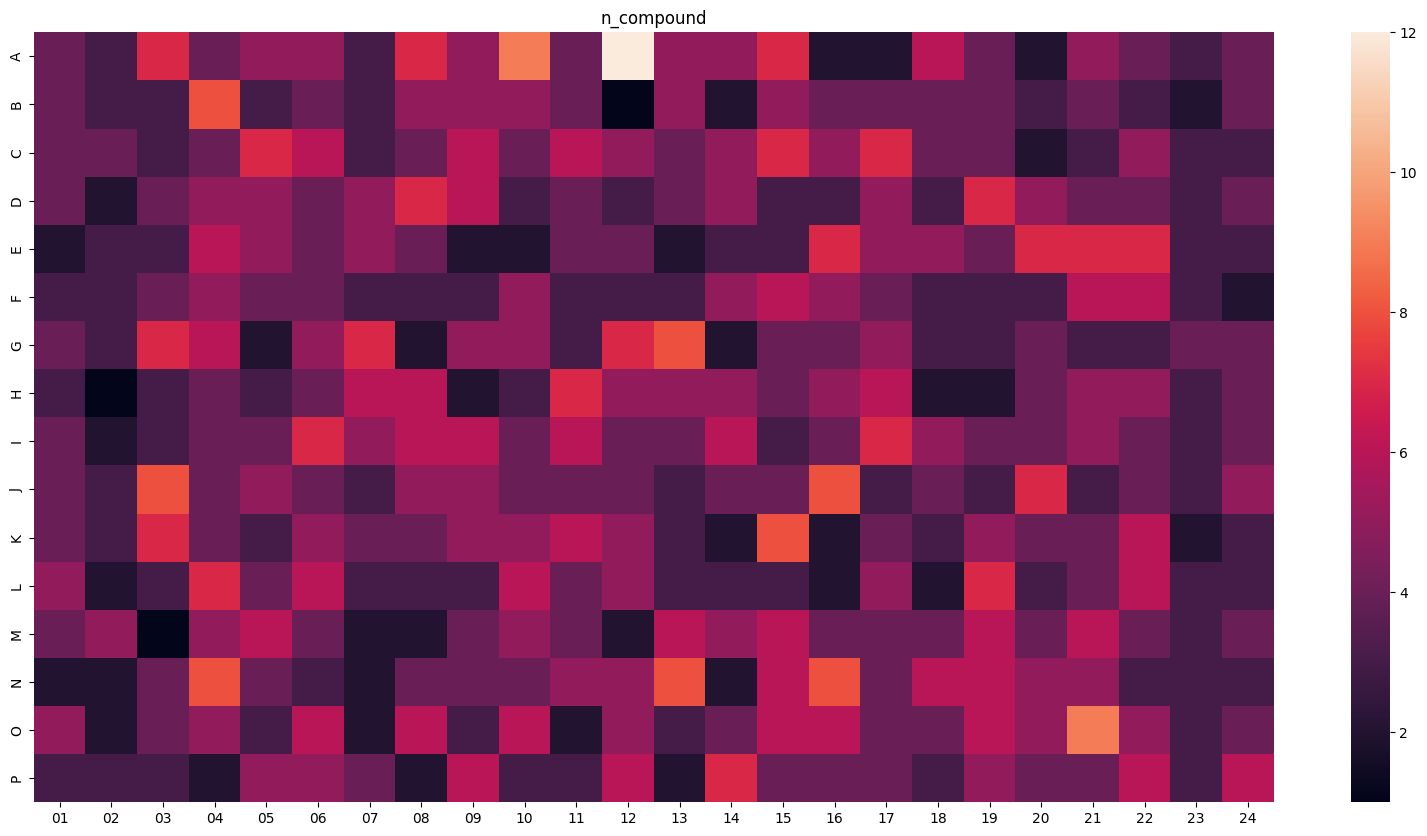

In [676]:
show_distribution(merge_table_filtered2)

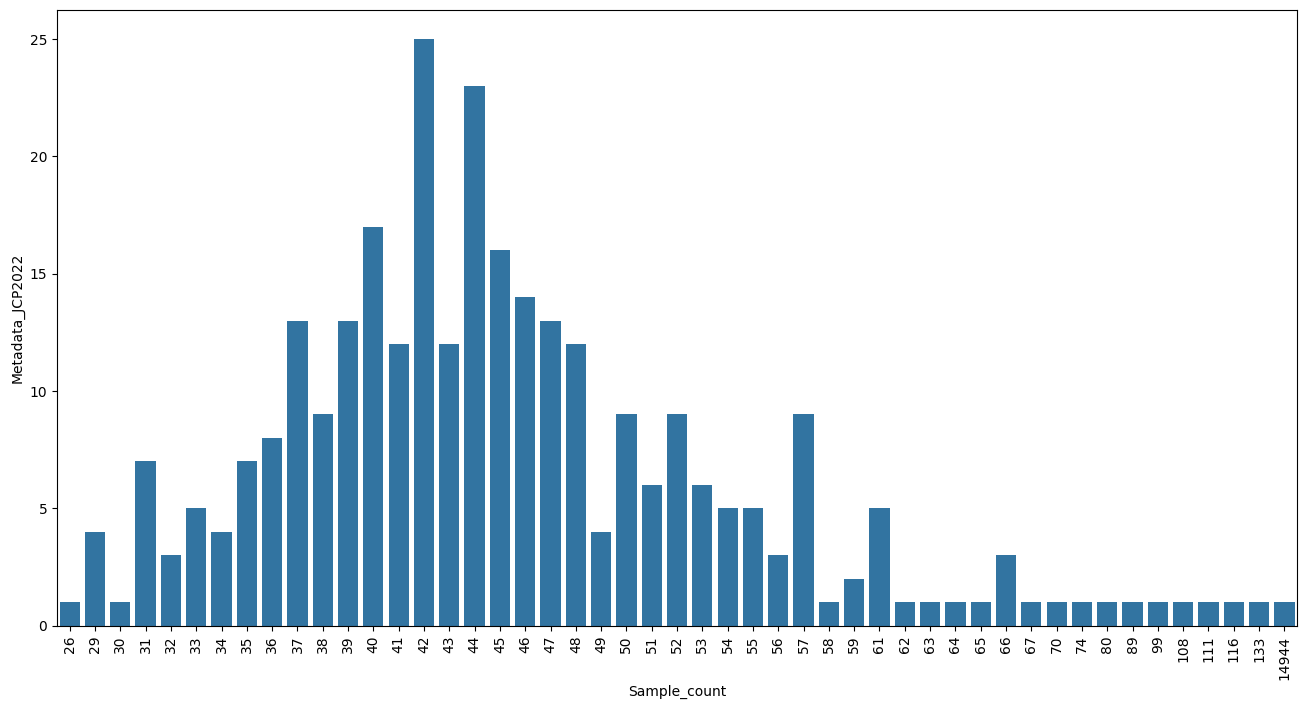

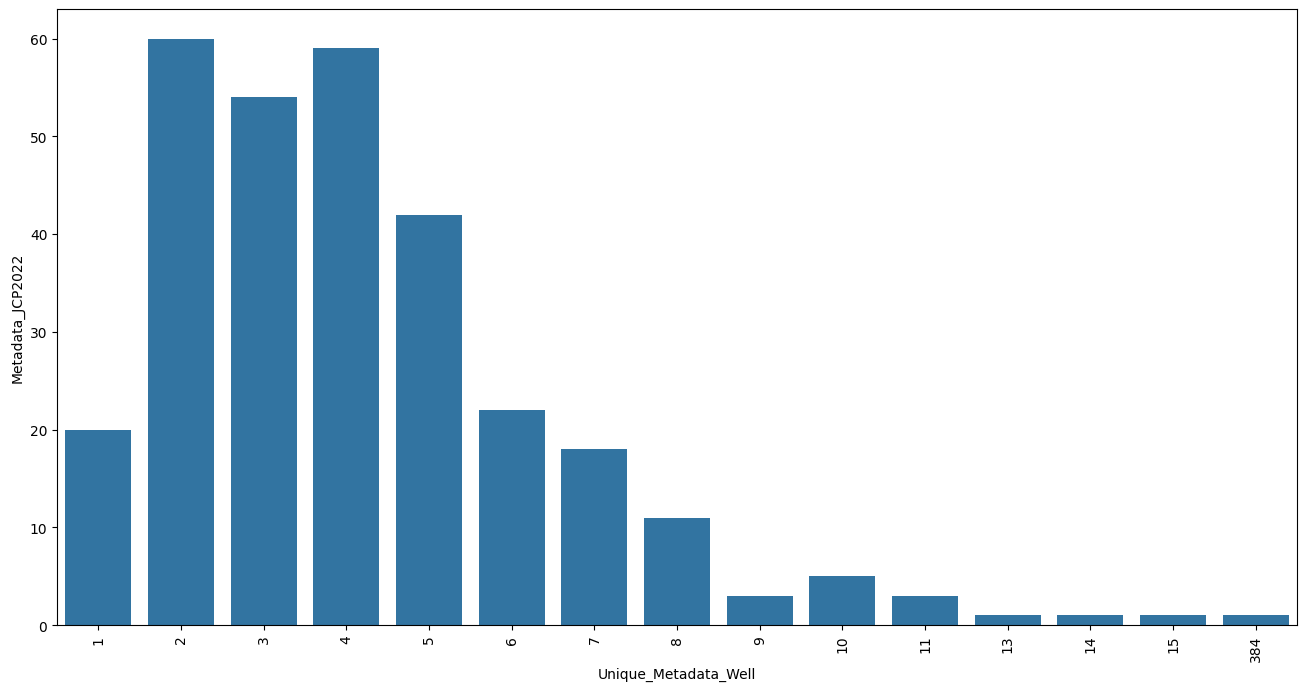

In [677]:
compounds_info_filtered2 = (merge_table_filtered2.group_by("Metadata_JCP2022")
                  .agg(pl.col("Metadata_InChIKey").count().alias("Sample_count"),
                       pl.col("Metadata_Source", "Metadata_Well", "Micro_id")
                       .n_unique().name.prefix("Unique_"))
                       )

fig, ax1 = plt.subplots(1, figsize=(16,8))

df_filtered2 = (compounds_info_filtered2.group_by("Sample_count")
             .agg(pl.col("Metadata_JCP2022").n_unique()).sort(by="Sample_count"))

sns.barplot(df_filtered2,
            x="Sample_count",
            y="Metadata_JCP2022",
            ax=ax1)
ax1.tick_params(axis='x', rotation=90)

fig, ax2 = plt.subplots(1, figsize=(16,8))

df2_filtered2 = (compounds_info_filtered2.group_by("Unique_Metadata_Well")
             .agg(pl.col("Metadata_JCP2022").n_unique()).sort(by="Unique_Metadata_Well"))

sns.barplot(df2_filtered2,
            x="Unique_Metadata_Well",
            y="Metadata_JCP2022",
            ax=ax2)
ax2.tick_params(axis='x', rotation=90)

Text(0.5, 1.0, 'Count of Unique Well per source per compound')

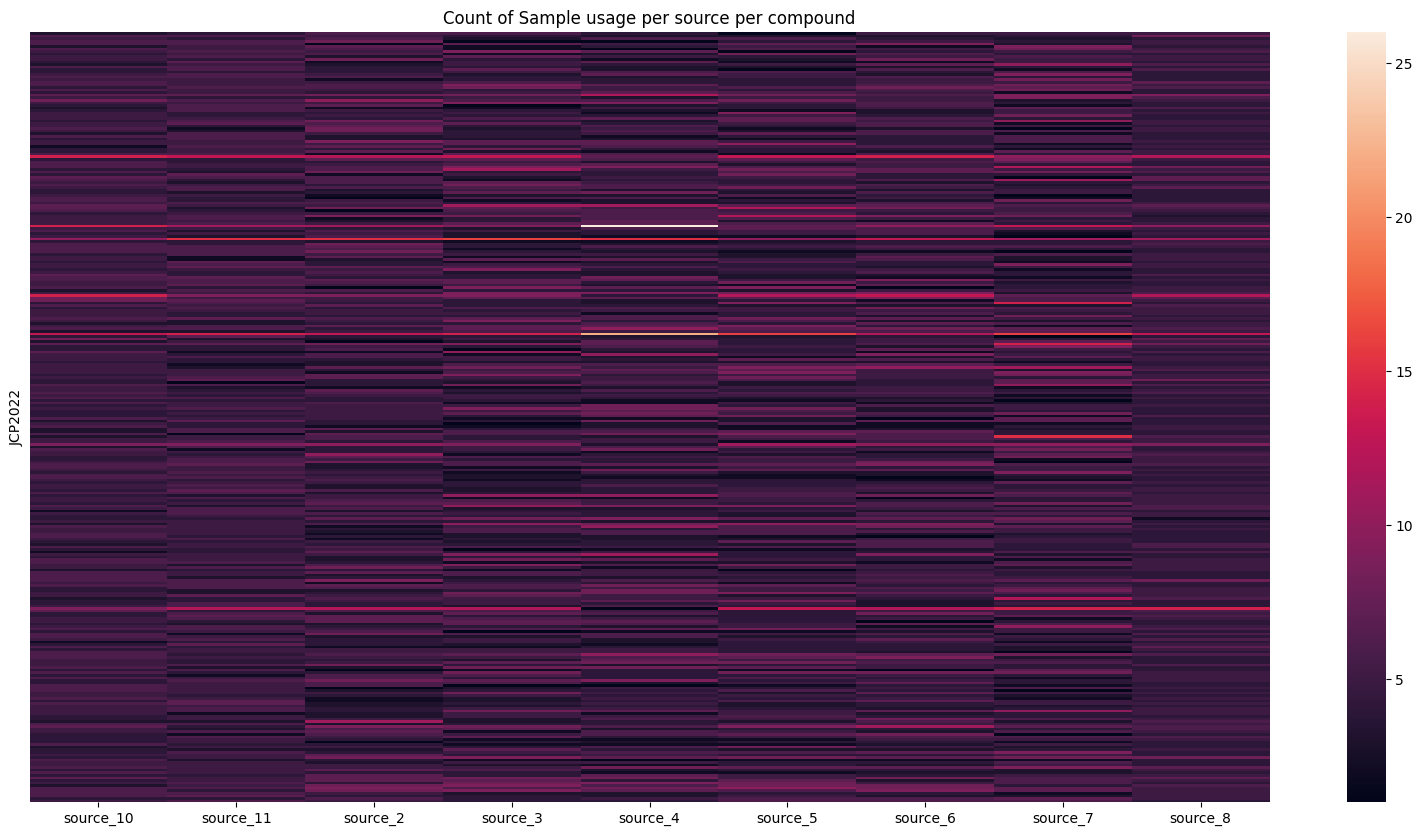

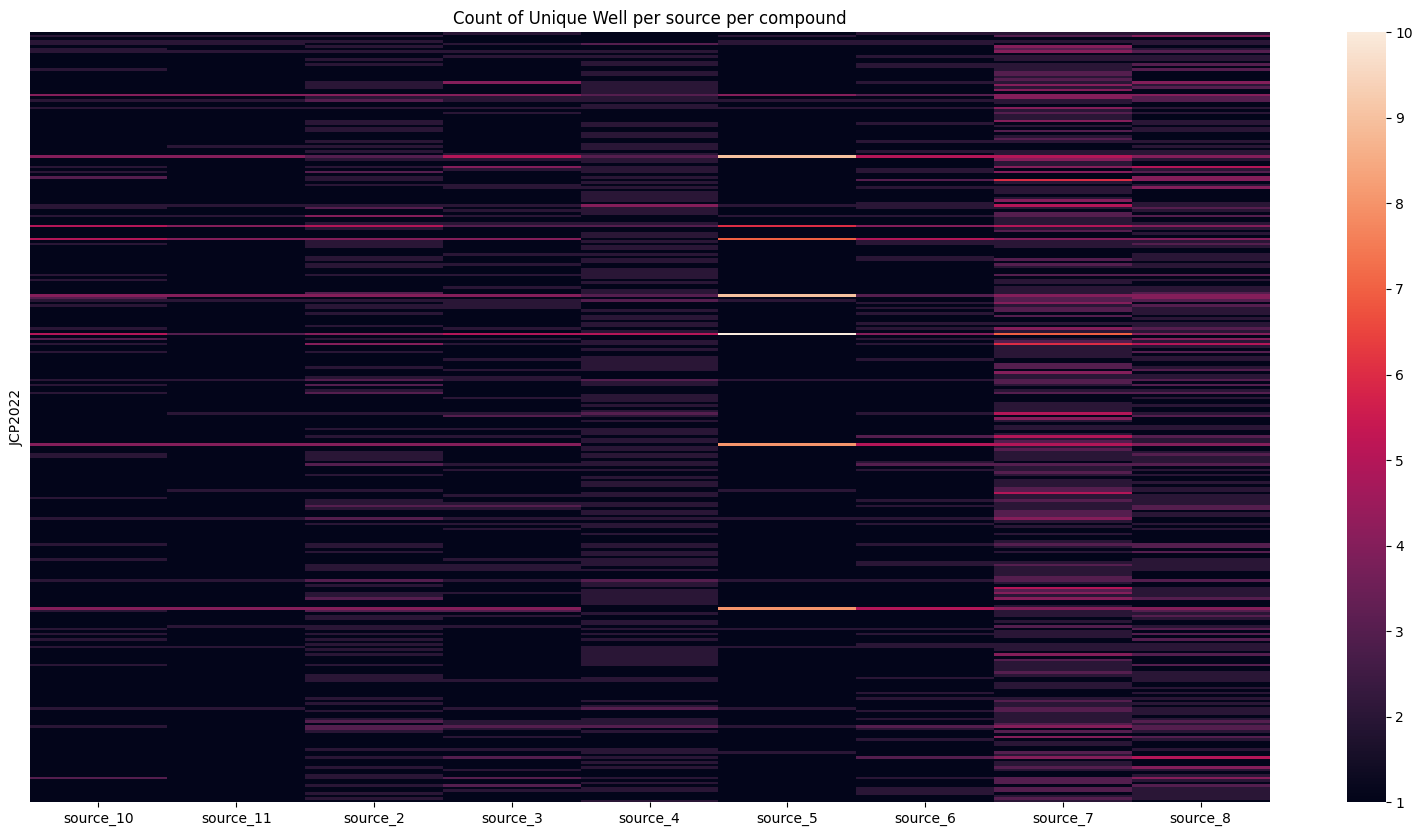

In [678]:
well_p_source_p_compound2 = (merge_table_filtered2.filter(pl.col("Metadata_JCP2022").is_in(controle_name) != True)
                            .group_by(["Metadata_JCP2022", "Metadata_Source"])
 .agg(pl.col("Metadata_JCP2022").count().alias("n_sample"),
      pl.col("Metadata_Well").n_unique().alias("n_well_unique"))
 .sort(by=["Metadata_JCP2022", "Metadata_Source"]))

count_sample_p_source_p_compound2 = well_p_source_p_compound2.pivot(index="Metadata_JCP2022",
                                                                 columns="Metadata_Source",
                                                                 values="n_sample")

unique_well_p_source_p_compound2 = well_p_source_p_compound2.pivot(index="Metadata_JCP2022",
                                                                 columns="Metadata_Source",
                                                                 values="n_well_unique")

fig1, ax1 = plt.subplots(1, figsize=(20,10))
sns.heatmap(count_sample_p_source_p_compound2.select(pl.all().exclude("Metadata_JCP2022")),
            ax=ax1)

ax1.set_xticklabels(count_sample_p_source_p_compound2.columns[1:])
ax1.tick_params(left = False, labelleft = False)
ax1.set_ylabel("JCP2022")
ax1.set_title("Count of Sample usage per source per compound")

fig2, ax2 = plt.subplots(1, figsize=(20,10))
sns.heatmap(unique_well_p_source_p_compound2.select(pl.all().exclude("Metadata_JCP2022")),
            ax=ax2)
           #robust=True)
ax2.set_xticklabels(unique_well_p_source_p_compound2.columns[1:])
ax2.tick_params(left = False, labelleft = False)
ax2.set_ylabel("JCP2022")
ax2.set_title("Count of Unique Well per source per compound")

In [679]:
merge_table_filtered2.shape

(28738, 20)

In [680]:
merge_table_filtered2.group_by("Metadata_Source").agg(pl.col("Metadata_JCP2022").n_unique())

shape: (9, 2)
┌─────────────────┬──────────────────┐
│ Metadata_Source ┆ Metadata_JCP2022 │
│ ---             ┆ ---              │
│ str             ┆ u32              │
╞═════════════════╪══════════════════╡
│ source_7        ┆ 301              │
│ source_4        ┆ 301              │
│ source_11       ┆ 301              │
│ source_5        ┆ 301              │
│ source_8        ┆ 301              │
│ source_2        ┆ 301              │
│ source_3        ┆ 301              │
│ source_6        ┆ 301              │
│ source_10       ┆ 301              │
└─────────────────┴──────────────────┘

### j) Adding MOA

In [681]:
merge_table_filtered2 = merge_table_filtered2.with_columns(
    pl.when(pl.col("Metadata_JCP2022").str.contains("JCP2022_050797") &
    pl.col("pert_iname").str.contains("quinine"))
    .then(pl.lit("quinidine"))
    .otherwise(pl.col("pert_iname"))
    .alias("pert_iname"))

In [682]:
moa = pl.read_csv("https://s3.amazonaws.com/data.clue.io/repurposing/downloads/repurposing_drugs_20200324.txt",
            separator="\t",
            comment_prefix="!")

In [683]:
merge_table_filtered_moa = merge_table_filtered2.join(moa.select(
                                                      pl.col("pert_iname", "moa")),
                                                      on="pert_iname",
                                                      how="left")

Let's add the right pert_type and control type using the table from [broad_bable](https://github.com/broadinstitute/monorepo/blob/main/libs/jump_babel/tools/gen_database.py).

In [684]:
merge_table_filtered_moa.filter(
    pl.col("Metadata_JCP2022").is_in(["JCP2022_012818",
    "JCP2022_025848",
    "JCP2022_033924",
    "JCP2022_035095",
    "JCP2022_037716",
    "JCP2022_046054",
    "JCP2022_050797",
    "JCP2022_064022",
    "JCP2022_085227"])).select(
    pl.col("Metadata_JCP2022"),
    pl.col("pert_iname"),
    pl.col("pert_type"),
    pl.col("control_type"),
    pl.col("moa")).unique()

shape: (9, 5)
┌──────────────────┬───────────────┬───────────┬────────────────┬──────────────────────────────────┐
│ Metadata_JCP2022 ┆ pert_iname    ┆ pert_type ┆ control_type   ┆ moa                              │
│ ---              ┆ ---           ┆ ---       ┆ ---            ┆ ---                              │
│ str              ┆ str           ┆ str       ┆ str            ┆ str                              │
╞══════════════════╪═══════════════╪═══════════╪════════════════╪══════════════════════════════════╡
│ JCP2022_050797   ┆ quinidine     ┆ trt       ┆ NA             ┆ sodium channel blocker           │
│ JCP2022_035095   ┆ LY2109761     ┆ trt       ┆ NA             ┆ TGF beta receptor inhibitor      │
│ JCP2022_033924   ┆ DMSO          ┆ control   ┆ negcon         ┆ control vehicle                  │
│ JCP2022_025848   ┆ dexamethasone ┆ trt       ┆ NA             ┆ glucocorticoid receptor agonist  │
│ JCP2022_085227   ┆ aloxistatin   ┆ trt       ┆ NA             ┆ protease inhibitor               │
│ JCP2022_012818   ┆ TC-S-7004     ┆ control   ┆ poscon_cp      ┆ DYRK inhibitor                   │
│ JCP2022_046054   ┆ FK-866        ┆ control   ┆ poscon_diverse ┆ niacinamide                      │
│                  ┆               ┆           ┆                ┆ phosphoribosyltransf…            │
│ JCP2022_064022   ┆ NVS-PAK1-1    ┆ control   ┆ poscon_cp      ┆ p21 activated kinase inhibitor   │
│ JCP2022_037716   ┆ AMG900        ┆ control   ┆ poscon_cp      ┆ Aurora kinase inhibitor          │
└──────────────────┴───────────────┴───────────┴────────────────┴──────────────────────────────────┘

In [685]:
merge_table_filtered_moa = (merge_table_filtered_moa.with_columns(
pl.when(pl.col("Metadata_JCP2022").is_in(["JCP2022_025848", 
                                          "JCP2022_035095", 
                                          "JCP2022_050797", 
                                          "JCP2022_085227"]))
    .then(pl.lit("control"))
    .otherwise(pl.col("pert_type"))
    .alias("pert_type"),
pl.when(pl.col("Metadata_JCP2022").is_in(["JCP2022_025848", 
                                          "JCP2022_035095", 
                                          "JCP2022_050797", 
                                          "JCP2022_085227"]))
    .then(pl.lit("poscon"))
    .otherwise(pl.col("control_type"))
    .alias("control_type")))

#### Removing the samples without moa

In [686]:
merge_table_filtered_moa.filter(pl.col("moa").is_null()).select(
    pl.col("Metadata_JCP2022"),
    pl.col("pert_iname"),
    pl.col("pert_type"),
    pl.col("control_type"),
    pl.col("moa")).unique()

shape: (18, 5)
┌──────────────────┬───────────────────────────────────┬───────────┬──────────────┬──────┐
│ Metadata_JCP2022 ┆ pert_iname                        ┆ pert_type ┆ control_type ┆ moa  │
│ ---              ┆ ---                               ┆ ---       ┆ ---          ┆ ---  │
│ str              ┆ str                               ┆ str       ┆ str          ┆ str  │
╞══════════════════╪═══════════════════════════════════╪═══════════╪══════════════╪══════╡
│ JCP2022_096342   ┆ ML-323                            ┆ control   ┆ poscon_cp    ┆ null │
│ JCP2022_001275   ┆ ML-193                            ┆ trt       ┆ NA           ┆ null │
│ JCP2022_022359   ┆ GSK-37647                         ┆ trt       ┆ NA           ┆ null │
│ JCP2022_068660   ┆ N-alpha-Methylhistamine-dihydroc… ┆ trt       ┆ NA           ┆ null │
│ …                ┆ …                                 ┆ …         ┆ …            ┆ …    │
│ JCP2022_112702   ┆ glutamine-(l)                     ┆ trt       ┆ NA           ┆ null │
│ JCP2022_105456   ┆ ZK811752                          ┆ trt       ┆ NA           ┆ null │
│ JCP2022_069491   ┆ cyclosporine                      ┆ trt       ┆ NA           ┆ null │
│ JCP2022_043547   ┆ 1-octanol                         ┆ trt       ┆ NA           ┆ null │
└──────────────────┴───────────────────────────────────┴───────────┴──────────────┴──────┘

In [687]:
merge_table_filtered_moa = merge_table_filtered_moa.filter(pl.col("moa").is_not_null())

#### Check if there is a unique set of keys which match the metadata keys to get features

The metadata which serves as a keys are: 

| Metadata_Source | Metadata_Plate | Metadata_Well | Metadata_JCP2022 |
|-----------------|----------------|---------------|------------------|

So it is important to verify that this set of keys uniquely identify the table. 

In [688]:
merge_table_filtered_moa = merge_table_filtered_moa.unique()

In [689]:
is_unique_id = (merge_table_filtered_moa.group_by(["Metadata_Source", "Metadata_Plate", 
                                  "Metadata_Well", "Metadata_JCP2022"])
 .agg(
     (pl.sum_horizontal(pl.all().exclude(["Metadata_Source", "Metadata_Plate", 
                                  "Metadata_Well", "Metadata_JCP2022"]).n_unique())
       + 4 - len(merge_table_filtered_moa.columns)).alias("n_multiple_value")))
is_unique_id.head()

shape: (5, 5)
┌─────────────────┬────────────────┬───────────────┬──────────────────┬──────────────────┐
│ Metadata_Source ┆ Metadata_Plate ┆ Metadata_Well ┆ Metadata_JCP2022 ┆ n_multiple_value │
│ ---             ┆ ---            ┆ ---           ┆ ---              ┆ ---              │
│ str             ┆ str            ┆ str           ┆ str              ┆ u32              │
╞═════════════════╪════════════════╪═══════════════╪══════════════════╪══════════════════╡
│ source_5        ┆ APTJUM324      ┆ G23           ┆ JCP2022_033924   ┆ 0                │
│ source_5        ┆ ADMJUM014      ┆ D04           ┆ JCP2022_033924   ┆ 0                │
│ source_11       ┆ EC133-171LM2   ┆ E15           ┆ JCP2022_084963   ┆ 0                │
│ source_2        ┆ 1086293560     ┆ N02           ┆ JCP2022_033924   ┆ 0                │
│ source_5        ┆ ADMJUM018      ┆ I06           ┆ JCP2022_033924   ┆ 0                │
└─────────────────┴────────────────┴───────────────┴──────────────────┴──────────────────┘

In [690]:
is_unique_id.filter(
    pl.col("n_multiple_value") > 0)

shape: (0, 5)
┌─────────────────┬────────────────┬───────────────┬──────────────────┬──────────────────┐
│ Metadata_Source ┆ Metadata_Plate ┆ Metadata_Well ┆ Metadata_JCP2022 ┆ n_multiple_value │
│ ---             ┆ ---            ┆ ---           ┆ ---              ┆ ---              │
│ str             ┆ str            ┆ str           ┆ str              ┆ u32              │
╞═════════════════╪════════════════╪═══════════════╪══════════════════╪══════════════════╡
└─────────────────┴────────────────┴───────────────┴──────────────────┴──────────────────┘

### k) Exporting into a csv file

#### Quick info on the final table

In [700]:
merge_table_filtered_moa.group_by("control_type").agg(pl.col("Metadata_JCP2022").n_unique().alias("n_compound"),
                                                         pl.col("Metadata_JCP2022").count().alias("n_sample"))

shape: (6, 3)
┌────────────────┬────────────┬──────────┐
│ control_type   ┆ n_compound ┆ n_sample │
│ ---            ┆ ---        ┆ ---      │
│ str            ┆ u32        ┆ u32      │
╞════════════════╪════════════╪══════════╡
│ NA             ┆ 235        ┆ 10332    │
│ negcon         ┆ 1          ┆ 14944    │
│ poscon_diverse ┆ 14         ┆ 767      │
│ poscon_cp      ┆ 24         ┆ 1211     │
│ poscon         ┆ 4          ┆ 451      │
│ poscon_orf     ┆ 5          ┆ 211      │
└────────────────┴────────────┴──────────┘

Apparently there is more poscon than the 8 poscon + 1 negcon stated in [broad_bable](https://github.com/broadinstitute/monorepo/blob/main/libs/jump_babel/tools/gen_database.py):
* "JCP2022_012818": "poscon",  # "TC-S-7004",
* "JCP2022_025848": "poscon",  # "Dexamethasone",
* "JCP2022_033924": "negcon",  # "DMSO",
* "JCP2022_035095": "poscon",  # "LY2109761",
* "JCP2022_037716": "poscon",  # "AMG900",
* "JCP2022_046054": "poscon",  # "FK-866",
* "JCP2022_050797": "poscon",  # "Quinidine",
* "JCP2022_064022": "poscon",  # "NVS-PAK1-1",
* "JCP2022_085227": "poscon",  # "Aloxistatin",

It looks like that some compound treatment are poscon for a specific experiment so it does increase the number of control. 

In [699]:
merge_table_filtered_moa.with_columns(
    pl.when(pl.col("control_type").str.contains("poscon"))
    .then(pl.lit("poscon"))
    .otherwise(pl.col("control_type"))
    .alias("control_type")).group_by("control_type").agg(pl.col("Metadata_JCP2022").n_unique().alias("n_compound"),
                                                         pl.col("Metadata_JCP2022").count().alias("n_sample"))

shape: (3, 3)
┌──────────────┬────────────┬──────────┐
│ control_type ┆ n_compound ┆ n_sample │
│ ---          ┆ ---        ┆ ---      │
│ str          ┆ u32        ┆ u32      │
╞══════════════╪════════════╪══════════╡
│ poscon       ┆ 47         ┆ 2640     │
│ NA           ┆ 235        ┆ 10332    │
│ negcon       ┆ 1          ┆ 14944    │
└──────────────┴────────────┴──────────┘

In [694]:
merge_table_filtered_moa.write_csv("target2_metadata")